In [1]:
#This case study aims to give you an idea of applying EDA on the loan dataset.
#Given: The dataset contains information about past loan applicants and whether they ‘defaulted’ or not. 
#To Derive : To understand the driving factors behind loan, to utilise the analysis for its portfolio and risk assessment. 

In [2]:
# import the libraries  
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#import the dataset
df = pd.read_csv("D:\\Loan_EDA\\loan.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_53676\2280397348.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\\Loan_EDA\\loan.csv")


In [4]:
#checking the rows and columns
df.shape

(39717, 111)

In [5]:
#Check datatypes
print(df.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [6]:
#print first 5 rows
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
#There are 111 columns and 39717 rows.
#Few columns have empty values , decimal values.

In [11]:
#checking how many null values are present in each of the columns
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [13]:
#checking columns having null values more than 50%
null_col_50 = null_values(df)[null_values(df)>50]
print(null_col_50)

verification_status_joint         100.00
annual_inc_joint                  100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_old_il_acct                100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt    

In [15]:
print("Number of columns having missing values more than 50% :",len(null_col_50))

Number of columns having missing values more than 50% : 57


In [14]:
#There are 57 columns having null values more than 50% which are related to no.of accounts,no.of installments open ,months data for revolving.

In [16]:
# Will drop all these column
null_col_50.index  

Index(['verification_status_joint', 'annual_inc_joint', 'mo_sin_old_rev_tl_op',
       'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi',
       'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m',
       'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il',
       'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m',
       'tot_cur_bal', 'tot_coll_amt', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_rev_tl_bal_gt_0', 'total_bc_limit',
       'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75',
       'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats', 'num_rev_accts',
       'mths_since_recent_bc', 'num_op_rev_tl', 'num_il_tl', 'num_bc_tl',
       'num_bc_sats', 'num_actv_rev_tl', 'num_actv_bc_tl',
       'num_accts_ever_120_pd', 'mths_since_recent_revol_delinq',
       'mths_since_rec

In [17]:
#dropping all the columns having missing values more than 50% 
df.drop(columns = null_col_50.index, inplace = True)

In [18]:
df.shape

(39717, 54)

In [23]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


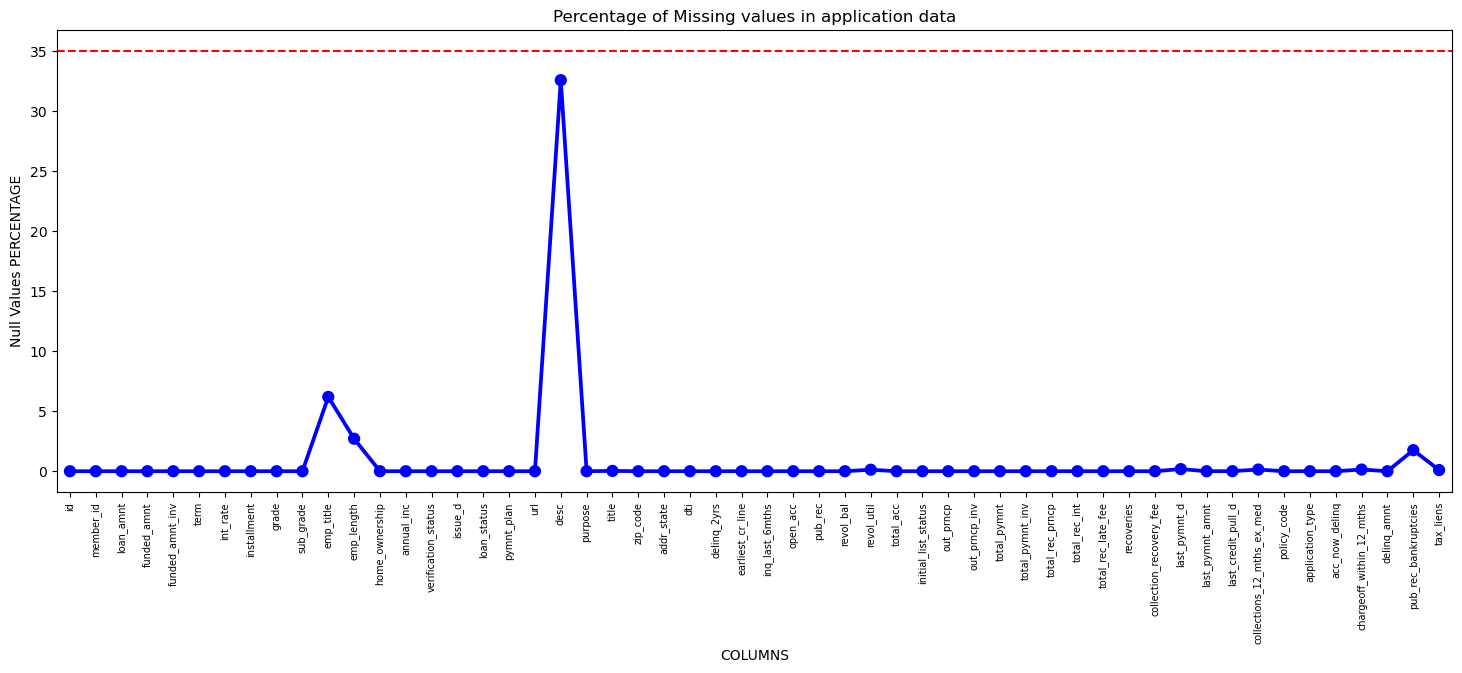

In [25]:
#plotting graph to understand the missing values percentage more than 35

null_applicationDF = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(35, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

#As per the plot below none of the columns are crossing the 35 percent of missing values.

In [29]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

#As per the analysis , we have empty dataframe for duplicate rows meaning there are no duplicate records in dataset.

Duplicate Rows:
Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 54 columns]


In [32]:
# Check data types of each column in the DataFrame
data_types = df.dtypes
print("Data Types:")
print(data_types)

Data Types:
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64


In [33]:
#Check for the unique values 
remove_columns_list = []
for i in df.columns:
    # Check if unique value count is 1
    if df[i].nunique() == 1:
        remove_columns_list.append(i)
    

# Remove those columns as the column has only a single unique value, it does not make any sense to include it.
df.drop(remove_columns_list, axis = 1, inplace = True)

In [34]:
df.shape

(39717, 45)

In [35]:
#The loan in progress cannot provide us insights, so dropping records where loan_status = 'Current'
df = df[df['loan_status'].str.lower() != "current"]

In [36]:
df.shape

(38577, 45)

In [37]:
#dropping the columns which are not contributing much 
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'zip_code'
]

df.drop(drop_cols, axis = 1, inplace = True)

In [38]:
df.shape

(38577, 18)

# Listing the significance of columns for customer details :
annual_inc : Reflects the customer's annual income, higher income enhances the likelihood of loan approval.
home_ownership :Indicates whether the customer owns a home or rents. Home ownership increases the probability of loan approval.
emp_length:Longer tenures signify greater financial stability, leading to higher chances of loan approval.
dti:A lower DTI translates to a higher chance of loan approval.

# Listing the significance of columns for loan details:
loan_amt:Money requested by the borrower as a loan.
grade:Represents a rating assigned to the borrower based on their creditworthiness.
term : Duration of the loan.
issue_d:Date when the loan was issued .
verification_status : Represents whether the borrower's income and other information have been verified.
int_rate :Represents the annual rate, at which the interest charged on the loan amount.
installment: It's the regular monthly payment the borrower needs to make to repay the loan, including both principal and interest.
public_rec_bankruptcy:A higher value in this column is associated with a lower success rate for loan approval.

# Dataset Row Analysis Conclusion:
Identifying and Removing Duplicate Rows: Duplicate rows in the dataset were not found.
Dropping Loan Status Rows with "Current" status: Rows with a "loan_status" of "Current" are dropped as they represent loans in progress and do not contribute to loan approval decisions. This step also helps clean up unnecessary columns related to "Current" loans 

# Dataset Column Analysis Conclusion:
Columns contain NA values are removed.
Columns contain only zero values are dropped.
Columns (id, membColumns (emp_title, desc, title) are dropped as they contain descriptive text (nouns) and do not contribute to the analysis.
The redundant column (url) are dropped.
660 records for pub_rec_bankruptcies are dropped due to missing values.

In [115]:
def plot_bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, freq_rotation=0, filter_column=None, filter_value=None):
    
    
    # Apply the filter if filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        filtered_dataframe = dataframe[dataframe[filter_column] == filter_value]
    else:
        filtered_dataframe = dataframe

    # Set the style
    sns.set(style="whitegrid")

    # Create the bar plot
    plt.figure(figsize=figsize)
    
    if y_column:
        y_data = filtered_dataframe[y_column].value_counts()
        x_data = y_data.index
        sns.barplot(x=x_data, y=y_data.values, hue=hue_column)
    else:
        sns.barplot(data=filtered_dataframe, x=x_column, hue=hue_column)

    # Display frequency on top of the bars with rotation
    if y_column:
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=freq_rotation)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=x_tick_rotation)

    # Show the plot
    plt.show()

In [41]:
def calculate_boxplot_stats(df: pd.DataFrame, column: str, iqr_multiplier: float = 1.5) -> dict:
   
    quartile1 = df[column].quantile(0.25)
    quartile3 = df[column].quantile(0.75)
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - iqr_multiplier * iqr
    upper_bound = quartile3 + iqr_multiplier * iqr
    return {
        'iqr': iqr,
        'quartile1': quartile1,
        'quartile3': quartile3,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

In [42]:
def create_boxplot(df: pd.DataFrame, column_name: str, title: str = None, horizontal: bool = True) -> None:
   

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    plt.figure(figsize=(8, 6))
    if horizontal:
        sns.boxplot(y=df[column_name], orient='h', palette='Set2')
    else:
        sns.boxplot(x=df[column_name], orient='v', palette='Set2')

    if title:
        plt.title(title)

    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.show()

In [73]:
def plot_histogram(data, column, bins=10, title=None, xlabel=None, ylabel=None, figsize=(8, 6)):
 
    # Set the style
    sns.set(style="whitegrid")

    # Create the histogram
    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=column, bins=bins, kde=True)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Show the plot
    plt.show()

In [74]:
def countplot_graph(data_dict: dict, annot=True) -> None:
    
    df = data_dict['data']
    x = data_dict['x']
    figsize = data_dict['figsize']
    hue = data_dict.get('hue')
    order = data_dict.get('order')
    x_tick_rotation = data_dict.get('x_tick_rotation')
    xlabel = data_dict.get('xlabel')
    ylabel = data_dict.get('ylabel')
    title = data_dict.get('title')
    palette = data_dict.get('palette')

    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    sns.countplot(x=x, hue=hue, data=df, order=order, palette=palette)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if annot:
        for p in ax.patches:
            ax.annotate('{:1}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 10))

    ax.set_title(title)
    
    if x_tick_rotation:
        plt.xticks(rotation=x_tick_rotation)

    plt.show()

In [75]:
def bucket_data(column, thresholds, labels) -> str:
    
    for i, threshold in enumerate(thresholds):
        if column < threshold:
            return labels[i]
    return labels[-1]

In [76]:
def plot_charged_off_percentage(df, column, stacked=False):
   
    # Calculate Charged Off percentage
    charged_off_data = pd.crosstab(df[column], df['loan_status'], margins=True)
    charged_off_data['Total'] = charged_off_data['Charged Off'] + charged_off_data['Fully Paid']
    charged_off_data['Charged Off %'] = round((charged_off_data['Charged Off'] * 100 / charged_off_data['Total']), 2)
    # Remove the last row with sum total
    charged_off_data = charged_off_data[0:-1]

    # Plot
    fig, ax1 = plt.subplots(figsize=(20, 8))

    # Line plot for Charged Off Percentage
    charged_off_plot = charged_off_data[['Charged Off %']]
    line = charged_off_plot.plot(ax=ax1, marker='o', color='r', lw=2)
    line.set_title(column.title() + ' vs Charged Off %', fontsize=20, weight="bold")
    line.set_xlabel(column.title())
    line.set_ylabel('Charged Off %')

    # Bar plot for Number of Loans
    loans_plot = charged_off_data.iloc[:, 0:3]
    ax2 = loans_plot.plot(kind='bar', ax=ax1, rot=1, secondary_y=True, stacked=stacked)
    ax2.set_ylabel('Number of Loans')
    
    plt.show()

In [43]:
def charged_off_percent(df, column, duration):
    charged_off = df[(df[column] == duration) & (df['loan_status'] == 'Charged Off')][column].value_counts()[duration]
    total = df[df[column] == duration][column].value_counts()[duration]
    return round((charged_off / total) * 100, 2)

In [44]:
#sort data column ascending order
df = df.reindex(sorted(df.columns), axis=1)

# Column Conversions :
The term column  have the "months" text stripped and  converted to an integer.
Percentage columns like (int_rate) are currently in object format. These columnshave the "%" character stripped and is  converted to float.
Columns (loan_amnt, funded_amnt, funded_amnt_inv) are currently in object format and converted to float.
Columns (int_rate, installment, dti) are currently in object format and converted to float.
The issue_d column are converted to datetime format with date in YYYY-mm-dd format.
The emp_length column are converted to an integer with the following logic:
< 1 year: 0
1 year: 1
2 years: 2
3 years: 3
4 years: 4
5 years: 5
6 years: 6
7 years: 7
8 years: 8
9 years: 9
10+ years: 10

In [45]:
#Convert dti, funded_amnt ,funded_amnt_inv and loan_amnt to float 
df = df.astype({
    'dti': 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'
})

In [50]:
# Converting the column issue_d from string to DateTime
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')

In [77]:
# Convert int_rate column to float type
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

C:\Users\HP\AppData\Local\Temp\ipykernel_53676\3150164786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['int_rate'] = df['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))


# Outliers :
The analysis for outliers is performed on the mentioned columns: loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installment, annual_inc, dti.

In [52]:
df.annual_inc.value_counts().sort_index(ascending=False)

annual_inc
6000000.0    1
3900000.0    1
2039784.0    1
1900000.0    1
1782000.0    1
            ..
4888.0       1
4800.0       4
4200.0       2
4080.0       1
4000.0       1
Name: count, Length: 5215, dtype: int64

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


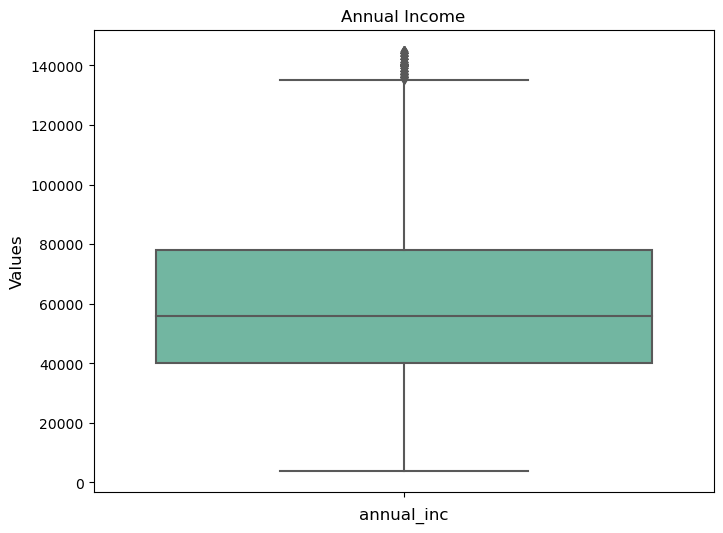

In [54]:
#Annual income has outliers. calculate IQR and filtering out the outliers outside of lower and upper bound
# Calculate the lower bound and upper bound
is_annual_inc_lb = calculate_boxplot_stats(df, 'annual_inc')['lower_bound']
is_annual_inc_ub = calculate_boxplot_stats(df, 'annual_inc')['upper_bound']
is_annual_inc_lt = df.annual_inc > is_annual_inc_lb
is_annual_inc_gt = df.annual_inc < is_annual_inc_ub

req_income = is_annual_inc_lt & is_annual_inc_gt

# Filter the rows with required annual income range between lower and upper bound
df = df[req_income]

# Show boxplot
create_boxplot(df, 'annual_inc', title='Annual Income')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


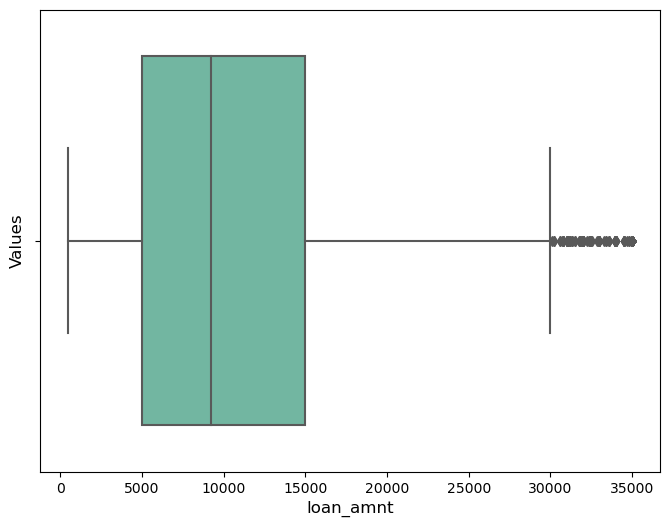

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


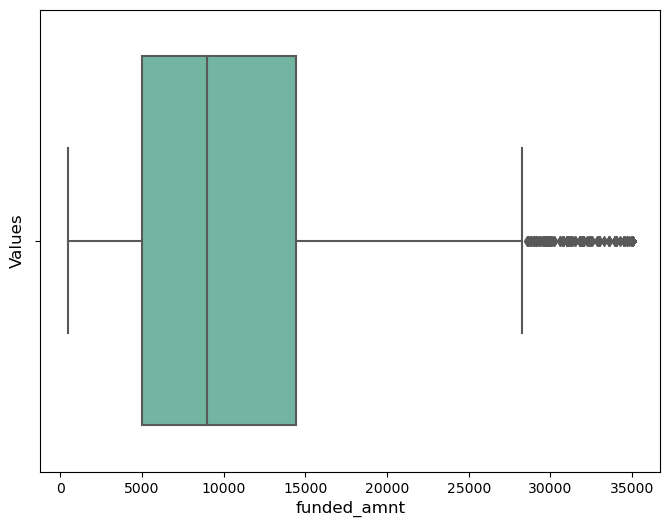

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


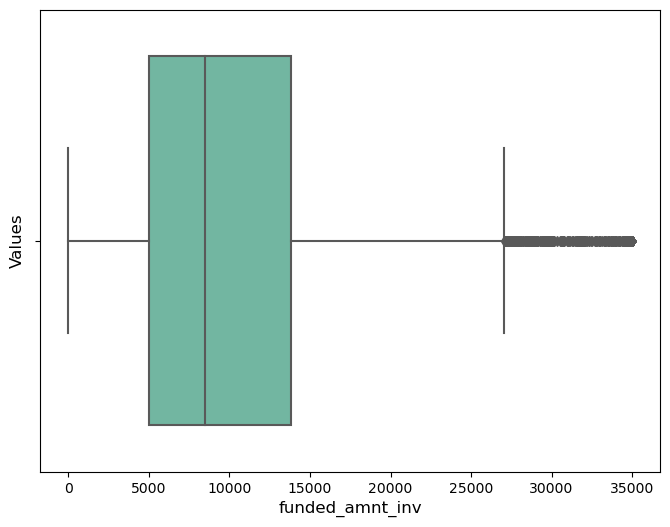

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


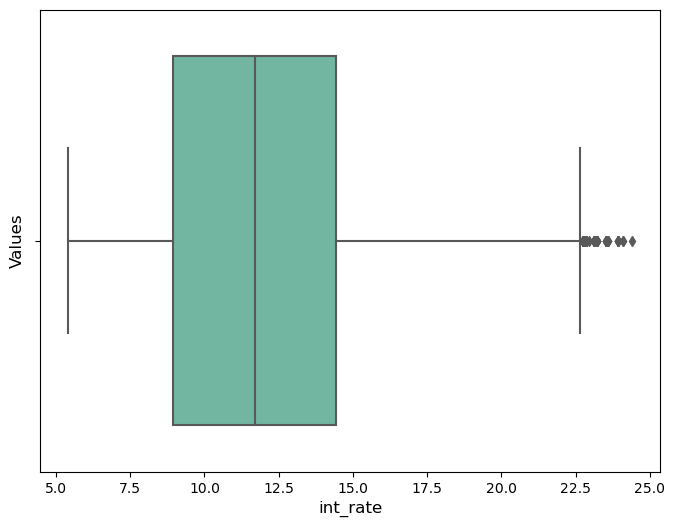

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


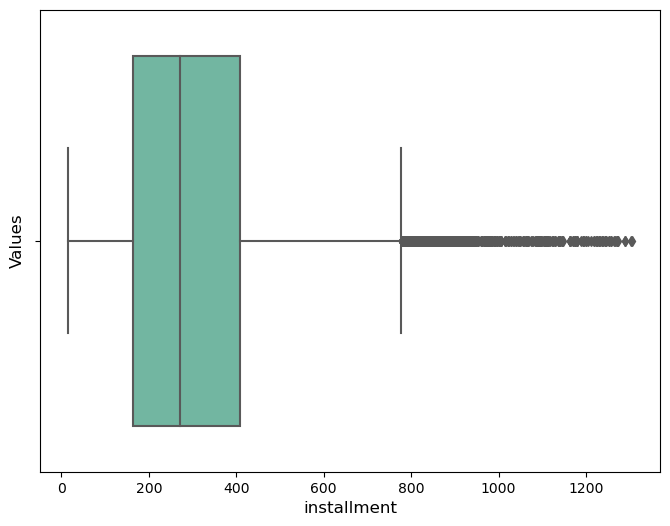

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


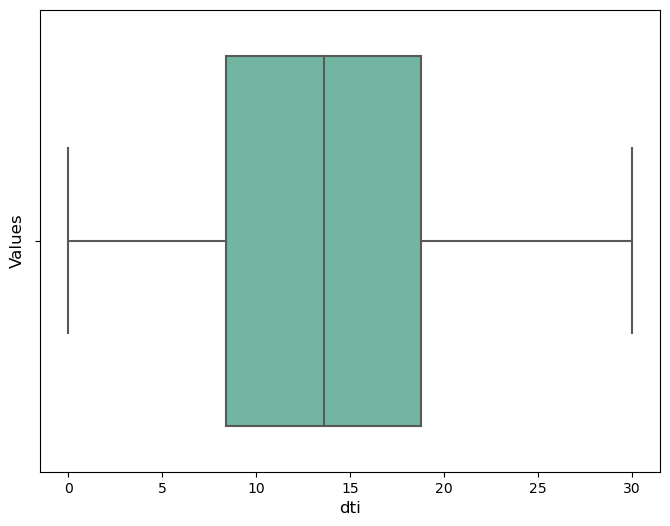

In [80]:
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv','int_rate', 'installment', 'dti']:
    create_boxplot(df, col, horizontal=False)

# Conclusions from above plots :
The annual income of most of the loan applicants is between 40, 000 - 75, 000 USD
The loan amount of most of the loan applicants is between 5, 000 - 15, 000
The funded amount of most of the loan applicants is between 5, 000 - 14, 000 USD
The funded amount by investor for most of the loan applicants is between 5, 000 - 14, 000 USD

In [ ]:
#Imputing column values 

In [58]:
# Annual income of loan applicants whose employment length is missing
df[df.emp_length.isna()]['annual_inc'].describe()

count      1015.000000
mean      42537.019271
std       24044.887728
min        4200.000000
25%       24468.000000
50%       37404.000000
75%       55780.000000
max      144000.000000
Name: annual_inc, dtype: float64

In [59]:
# most frequent value of employment length
df.emp_length.value_counts()

emp_length
10+ years    7923
< 1 year     4338
2 years      4112
3 years      3832
4 years      3206
1 year       3052
5 years      3051
6 years      2078
7 years      1646
8 years      1347
9 years      1154
Name: count, dtype: int64

In [60]:
df.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [61]:
#Employment length has 1015 missing values,with assumptions we are adding their employment duration with the mode value of emp_length which is 10+ years
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)
# Verify if the imputation of values is successful
df.emp_length.isna().sum()

0

In [62]:
df.home_ownership.value_counts()

home_ownership
RENT        18050
MORTGAGE    15750
OWN          2858
OTHER          93
NONE            3
Name: count, dtype: int64

In [63]:
#Imputing NONE values as OTHER for home_ownership
df['home_ownership'].replace('NONE', 'OTHER', inplace = True)

In [64]:
df.verification_status.value_counts()

verification_status
Not Verified       16306
Verified           11269
Source Verified     9179
Name: count, dtype: int64

In [65]:
#Replacing the 'Source Verified' values as 'Verified'
df['verification_status'].replace('Source Verified', 'Verified', inplace = True)

In [66]:
df.pub_rec_bankruptcies.isna().sum()

660

In [67]:
df[df.pub_rec_bankruptcies.isna()]

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
35006,NY,110000.0,7.07,< 1 year,15000.0,14875.000000,A,MORTGAGE,476.58,8.94%,2009-09-01,15000.0,Fully Paid,NaN,credit_card,A5,36,Not Verified
35058,TX,80800.0,14.97,3 years,3000.0,2988.236621,C,MORTGAGE,102.92,14.26%,2009-09-01,3000.0,Fully Paid,NaN,credit_card,C5,36,Not Verified
35362,MI,60000.0,11.08,< 1 year,4000.0,3892.258856,B,MORTGAGE,131.22,11.14%,2009-08-01,4000.0,Charged Off,NaN,car,B1,36,Not Verified
38443,NJ,37152.0,2.26,10+ years,2300.0,589.605658,D,RENT,77.69,13.17%,2008-08-01,2300.0,Fully Paid,NaN,moving,D2,36,Verified
38717,OH,75000.0,16.08,< 1 year,6000.0,500.000000,A,MORTGAGE,188.02,8.00%,2008-05-01,6000.0,Fully Paid,NaN,other,A3,36,Not Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,CO,75000.0,15.55,5 years,5000.0,700.000000,B,MORTGAGE,158.30,8.70%,2007-07-01,5000.0,Fully Paid,NaN,credit_card,B1,36,Not Verified
39712,CO,110000.0,11.33,4 years,2500.0,1075.000000,A,MORTGAGE,78.42,8.07%,2007-07-01,2500.0,Fully Paid,NaN,home_improvement,A4,36,Not Verified
39713,NC,18000.0,6.40,3 years,8500.0,875.000000,C,RENT,275.38,10.28%,2007-07-01,8500.0,Fully Paid,NaN,credit_card,C1,36,Not Verified
39714,MA,100000.0,2.30,< 1 year,5000.0,1325.000000,A,MORTGAGE,156.84,8.07%,2007-07-01,5000.0,Fully Paid,NaN,debt_consolidation,A4,36,Not Verified


In [69]:
#dropping these null rows 

df = df[df.pub_rec_bankruptcies.notna()]

In [70]:
# Verify if the dataset has no longer null values
df.isna().sum()

addr_state              0
annual_inc              0
dti                     0
emp_length              0
funded_amnt             0
funded_amnt_inv         0
grade                   0
home_ownership          0
installment             0
int_rate                0
issue_d                 0
loan_amnt               0
loan_status             0
pub_rec_bankruptcies    0
purpose                 0
sub_grade               0
term                    0
verification_status     0
dtype: int64

Dataset is cleaned now

# New columns that are extracted from current columns :
issue_y represents the year extracted from issue_d.
issue_m represents the month extracted from issue_d.
funded_amnt_bucket has been added for binning funded amount values.
annual_inc_bucket has been added for binning annual income values.
int_rate_bucket has been added for binning interest rate values.
issue_q has been added for binning the data quarter-wise.
loan_paid has been added for simple mapping of Yes (Fully Paid) or No (Charged Off).
dti_bucket has been added for binning DTI values from 8 (Very Low) to 20 (Very High).
loan_amnt_bucket has been added for binning loan amount values.

In [71]:
# Extracting Month and Year for analysis from issue_d
df['issue_m'] = pd.DatetimeIndex(df['issue_d']).month
df['issue_y'] = pd.DatetimeIndex(df['issue_d']).year

C:\Users\HP\AppData\Local\Temp\ipykernel_53676\1347653706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_m'] = pd.DatetimeIndex(df['issue_d']).month
C:\Users\HP\AppData\Local\Temp\ipykernel_53676\1347653706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_y'] = pd.DatetimeIndex(df['issue_d']).year


In [79]:
# Months into quater
threshold_months = [4, 7, 9]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
df['issue_q'] = df['issue_m'].apply(bucket_data, args=(threshold_months, quarter_labels))

C:\Users\HP\AppData\Local\Temp\ipykernel_53676\2321664884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_q'] = df['issue_m'].apply(bucket_data, args=(threshold_months, quarter_labels))


In [81]:
loan_status_map = {'Charged Off': 'No', 'Fully Paid': 'Yes' }
df['loan_paid'] = df['loan_status'].map(loan_status_map)

C:\Users\HP\AppData\Local\Temp\ipykernel_53676\240534615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_paid'] = df['loan_status'].map(loan_status_map)


In [82]:
# Categorising Loan Amount
loan_amount_thresholds = [5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
df['loan_amnt_bucket'] = df['loan_amnt'].apply(bucket_data, args=(loan_amount_thresholds, loan_amount_labels))


C:\Users\HP\AppData\Local\Temp\ipykernel_53676\2048292110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_amnt_bucket'] = df['loan_amnt'].apply(bucket_data, args=(loan_amount_thresholds, loan_amount_labels))


In [83]:
df[['loan_amnt', 'loan_amnt_bucket']]

,loan_amnt,loan_amnt_bucket
0,5000.0,5K - 10K
1,2500.0,0 - 5K
2,2400.0,0 - 5K
3,10000.0,10K - 15K
5,5000.0,5K - 10K
...,...,...
39562,4800.0,0 - 5K
39573,7000.0,5K - 10K
39623,9000.0,5K - 10K
39666,15450.0,15K - above


In [85]:
# Bucketthe int_rate
int_rate_bins = [5, 9, 13, 17, 21]
int_rate_labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
df['int_rate_bucket'] = df['int_rate'].apply(bucket_data, args=((int_rate_bins, int_rate_labels)))

C:\Users\HP\AppData\Local\Temp\ipykernel_53676\1238622795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['int_rate_bucket'] = df['int_rate'].apply(bucket_data, args=((int_rate_bins, int_rate_labels)))


In [86]:
df[['int_rate', 'int_rate_bucket']]

,int_rate,int_rate_bucket
0,10.65,9%-13%
1,15.27,13%-17%
2,15.96,13%-17%
3,13.49,13%-17%
5,7.90,5%-9%
...,...,...
39562,10.28,9%-13%
39573,10.59,9%-13%
39623,12.49,9%-13%
39666,11.22,9%-13%


In [87]:
#Bucket annual income
annual_inc_thresholds = [40000, 50000, 60000, 70000, 80000]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
df['annual_inc_bucket'] = df['annual_inc'].apply(bucket_data, args=(annual_inc_thresholds, annual_inc_labels))

C:\Users\HP\AppData\Local\Temp\ipykernel_53676\2851360007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annual_inc_bucket'] = df['annual_inc'].apply(bucket_data, args=(annual_inc_thresholds, annual_inc_labels))


In [88]:
df[['annual_inc', 'annual_inc_bucket']]

,annual_inc,annual_inc_bucket
0,24000.0,0 - 40k
1,30000.0,0 - 40k
2,12252.0,0 - 40k
3,49200.0,40k - 50k
5,36000.0,0 - 40k
...,...,...
39562,35000.0,0 - 40k
39573,63500.0,60k - 70k
39623,39000.0,0 - 40k
39666,40000.0,40k - 50k


In [89]:
#Bucket dti
# Bucketting DTI
dti_thresholds = [8, 12, 16, 20]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['dti_bucket'] = df['dti'].apply(bucket_data, args=(dti_thresholds, dti_labels))

C:\Users\HP\AppData\Local\Temp\ipykernel_53676\493083674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dti_bucket'] = df['dti'].apply(bucket_data, args=(dti_thresholds, dti_labels))


In [90]:
df[['dti', 'dti_bucket']]

,dti,dti_bucket
0,27.65,Very High
1,1.00,Very Low
2,8.72,Low
3,20.00,Very High
5,11.20,Low
...,...,...
39562,7.51,Very Low
39573,8.50,Low
39623,5.08,Very Low
39666,13.50,Medium


In [91]:
#get the categorical variables
df.select_dtypes(include=['object']).columns.tolist()

['addr_state',
 'emp_length',
 'grade',
 'home_ownership',
 'loan_status',
 'purpose',
 'sub_grade',
 'verification_status',
 'issue_q',
 'loan_paid',
 'loan_amnt_bucket',
 'int_rate_bucket',
 'annual_inc_bucket',
 'dti_bucket']

In [92]:
#get the numerical variables
df.select_dtypes(exclude=['object']).columns.tolist()

['annual_inc',
 'dti',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'pub_rec_bankruptcies',
 'term',
 'issue_m',
 'issue_y']

Univariate analysis :
Will check the above identified categorical fields.

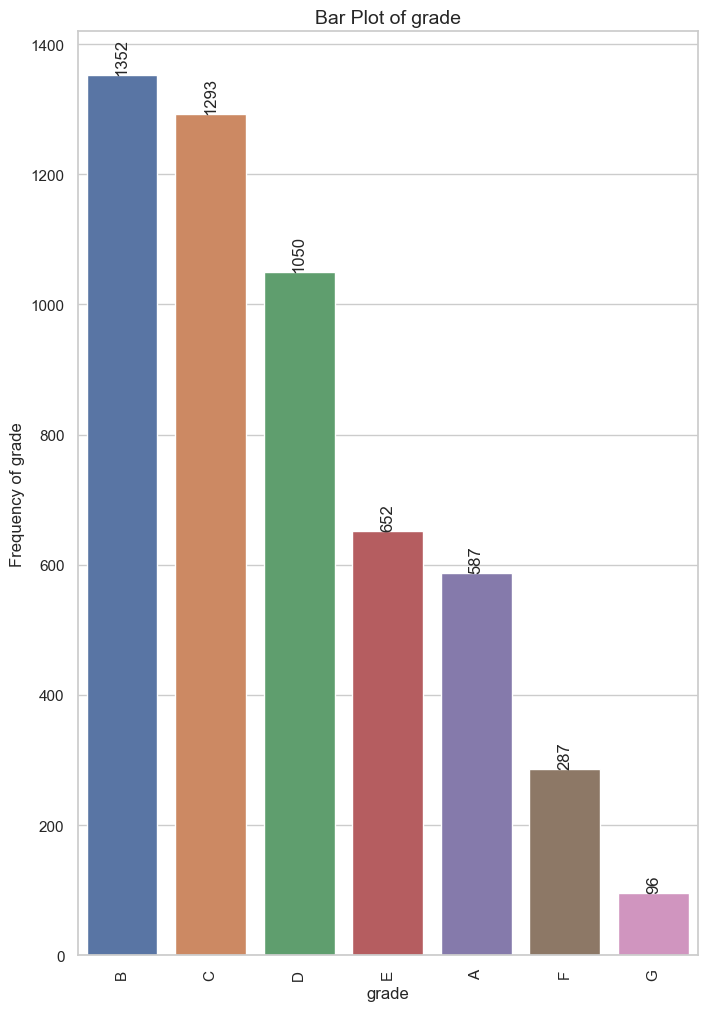

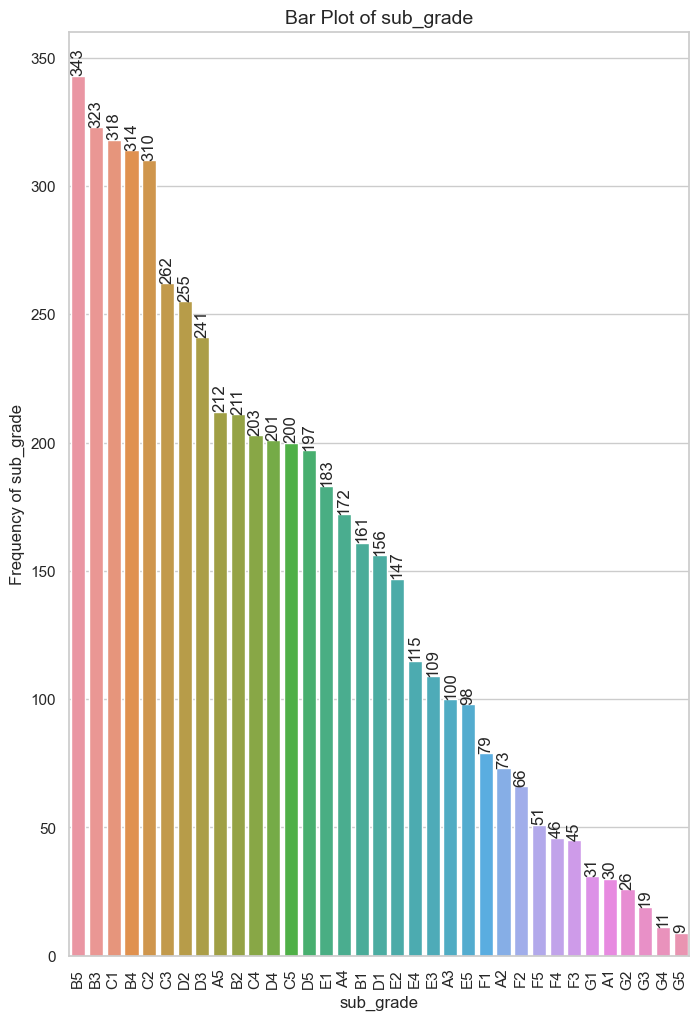

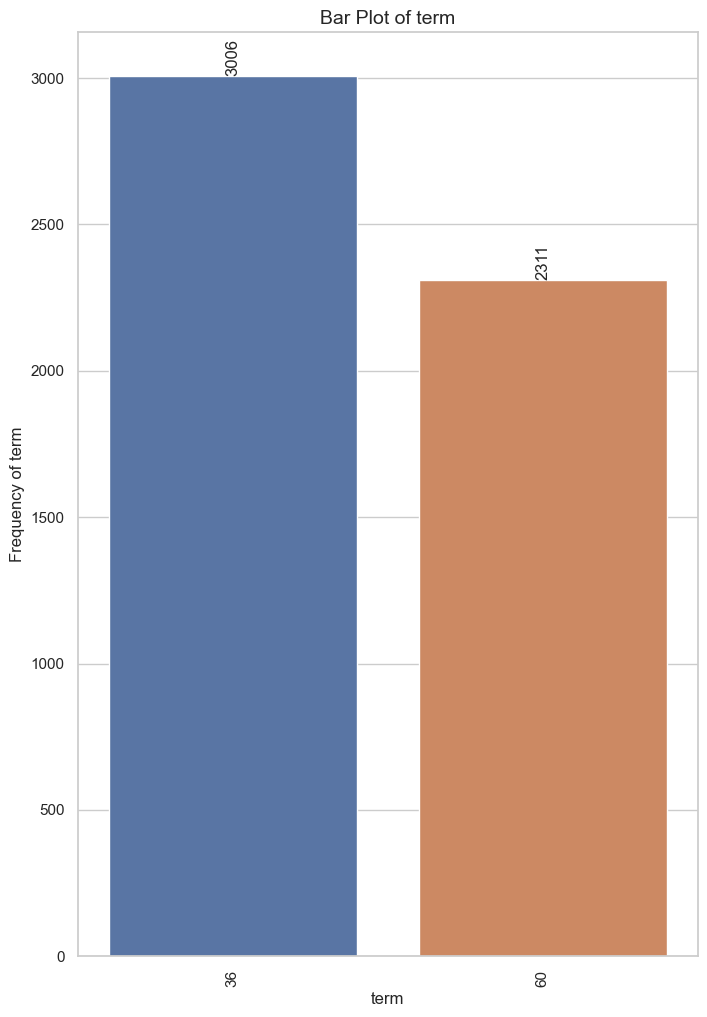

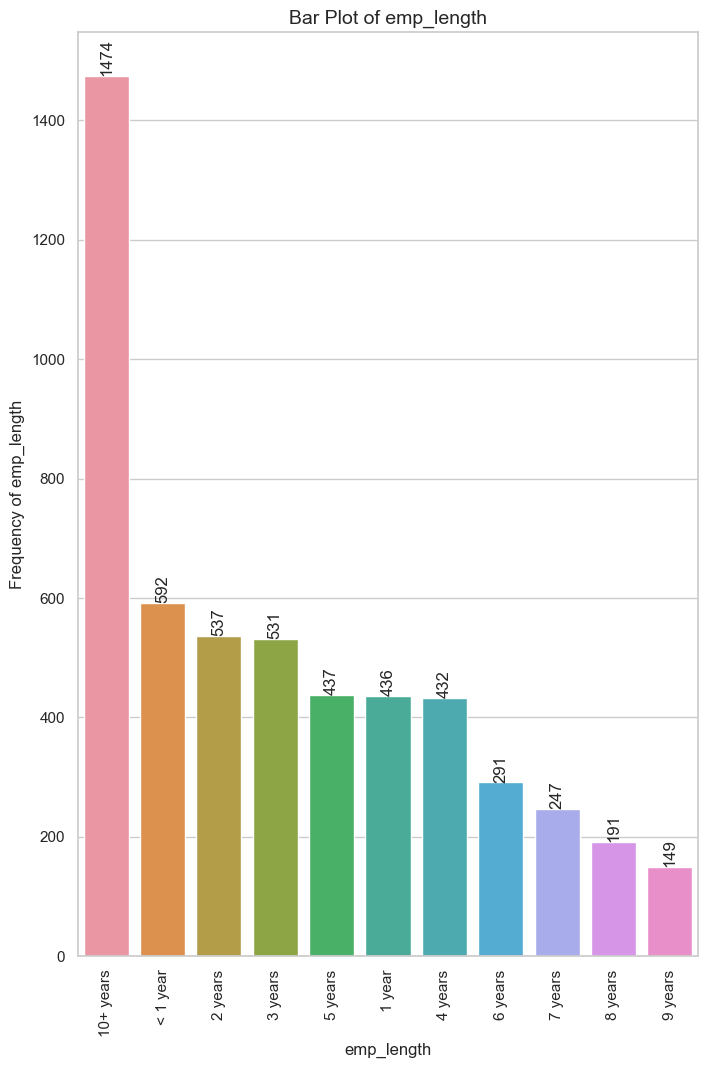

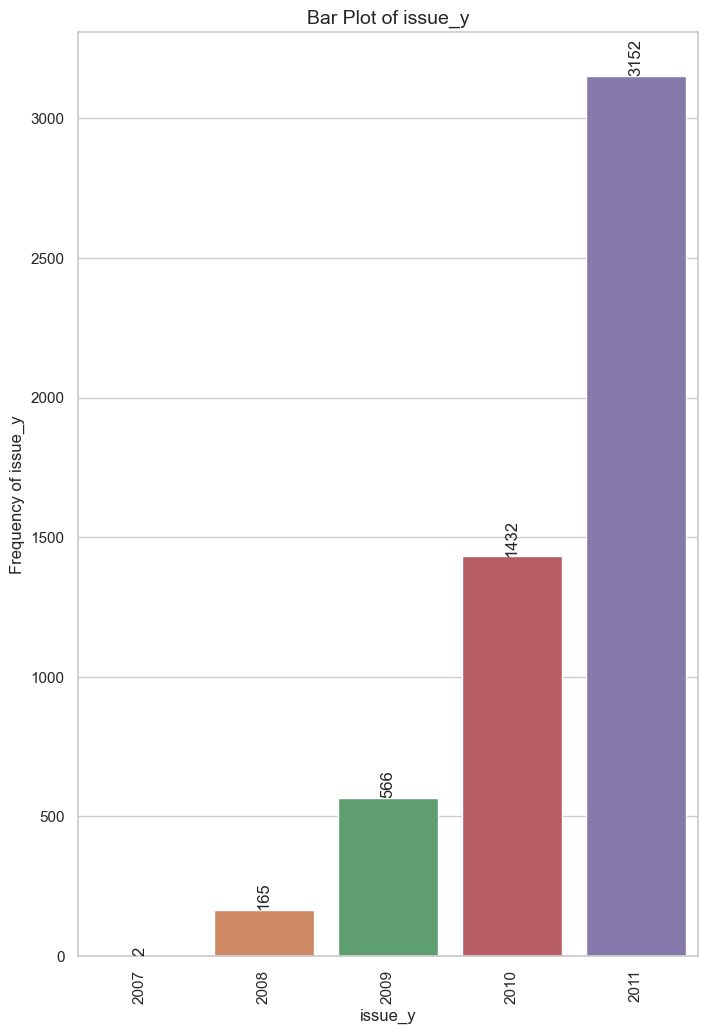

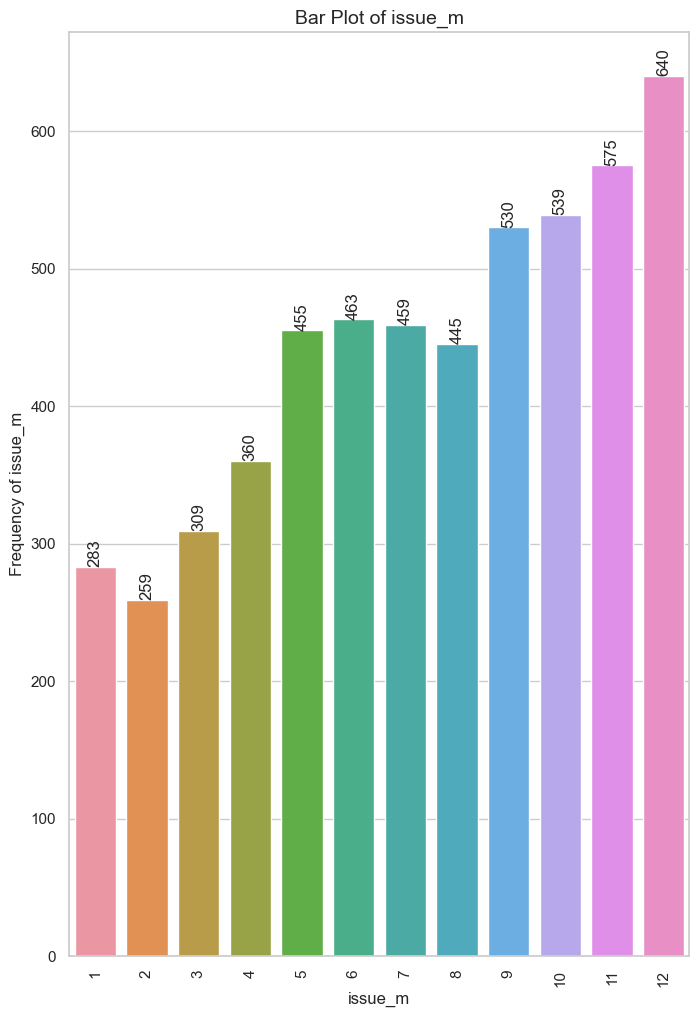

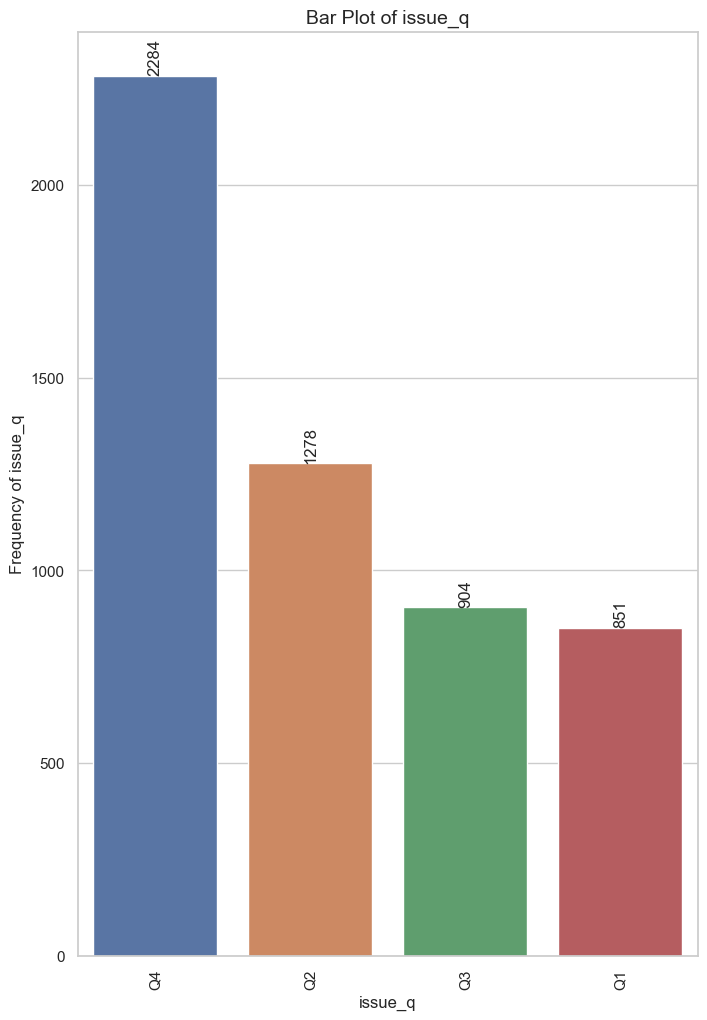

In [94]:
for cat_var in ['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m', 'issue_q']:
    plot_bar_graph(
        df,
        x_column = cat_var,
        y_column = cat_var,
        title = f'Bar Plot of {cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {cat_var}',
        figsize=(8, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

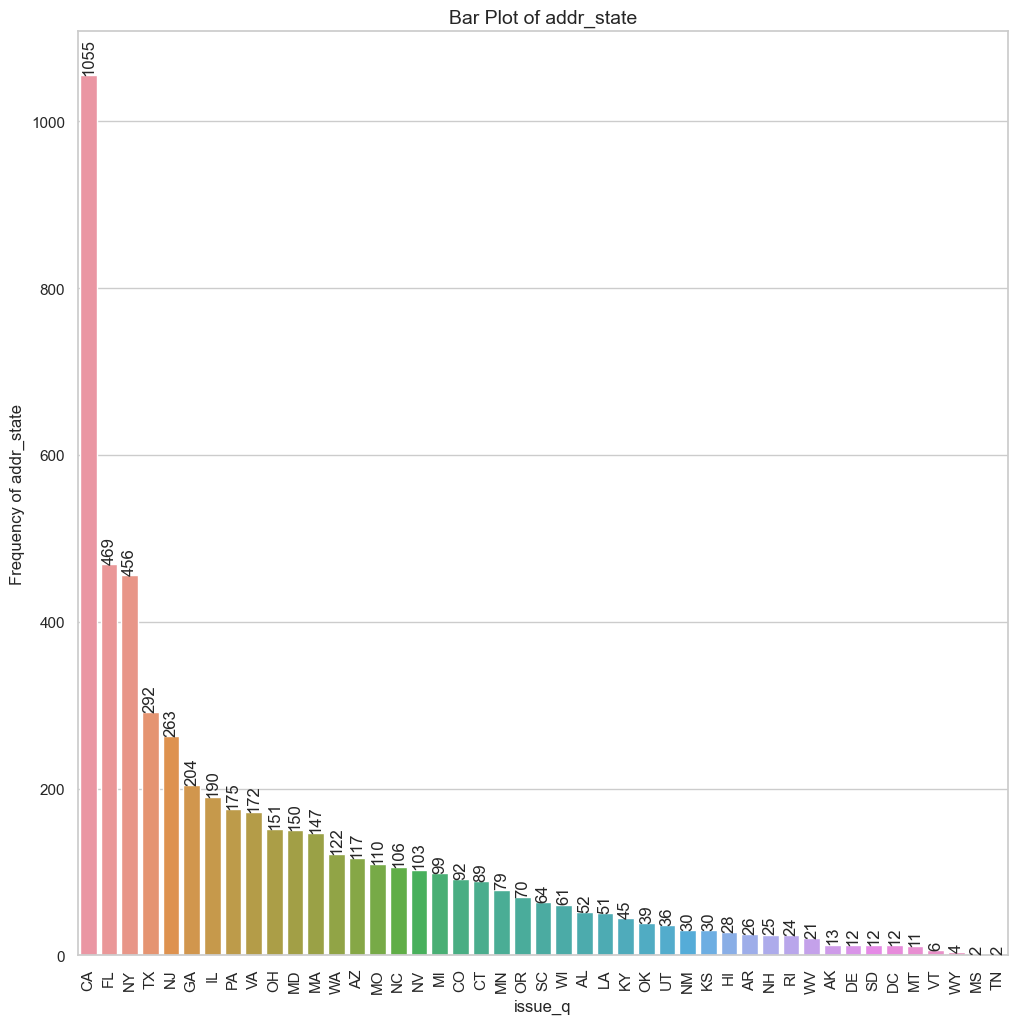

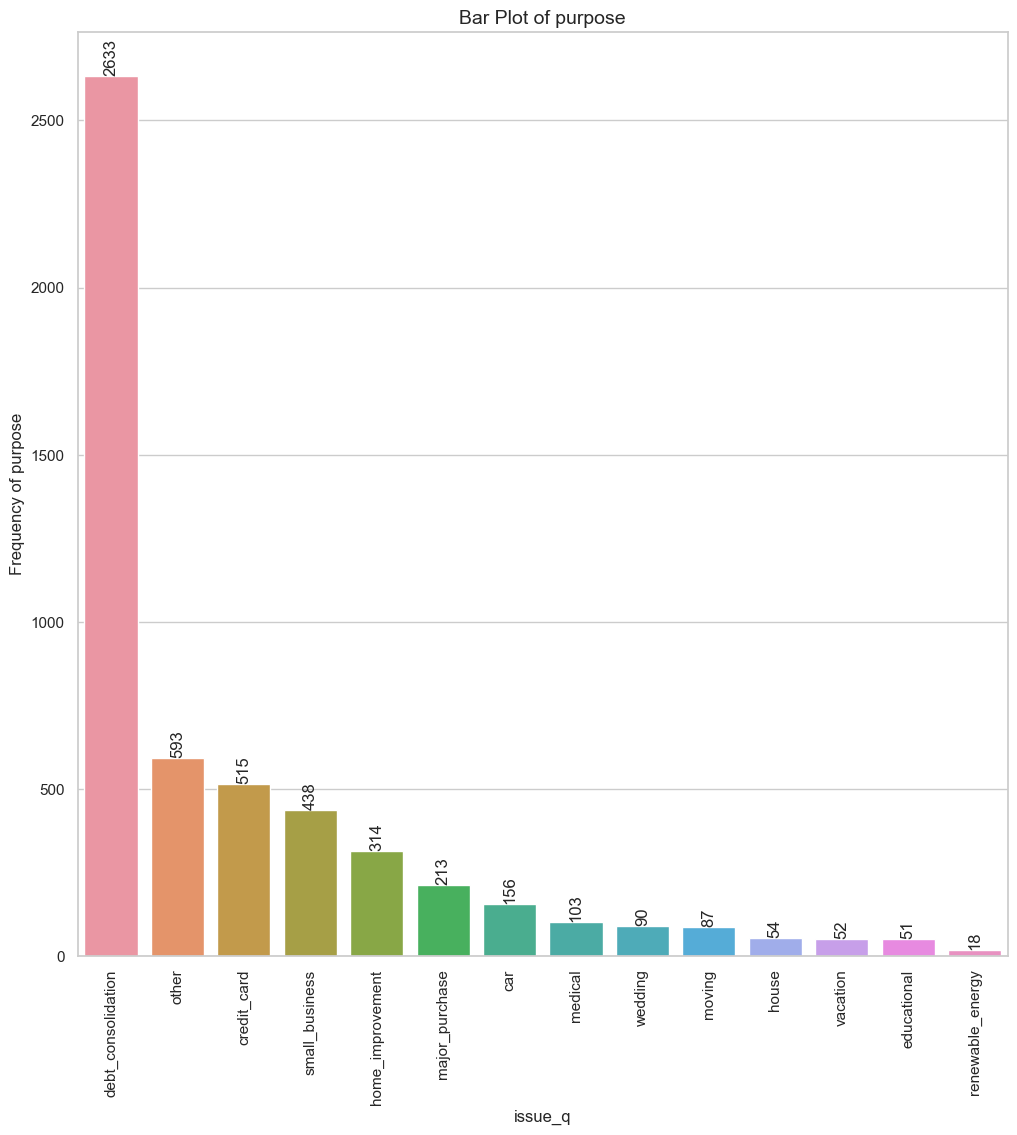

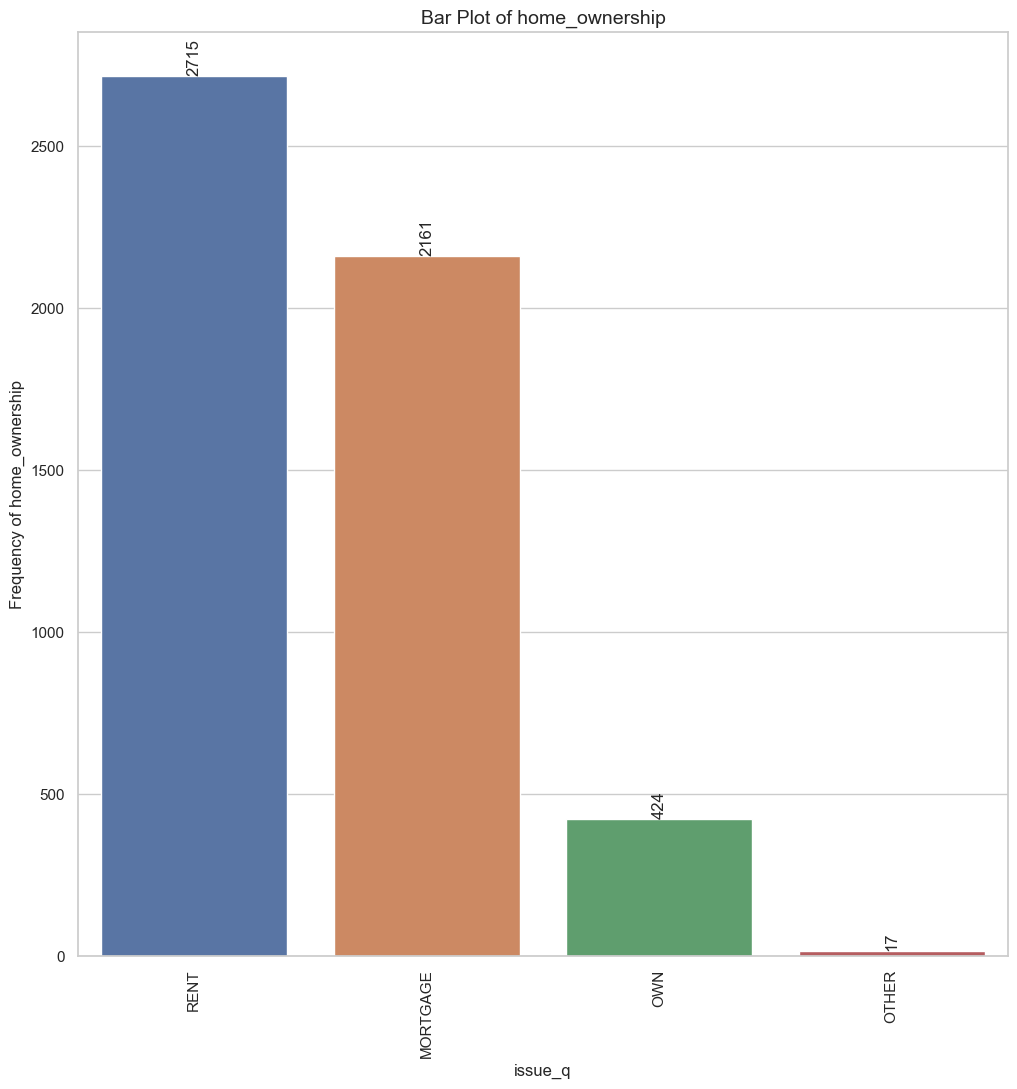

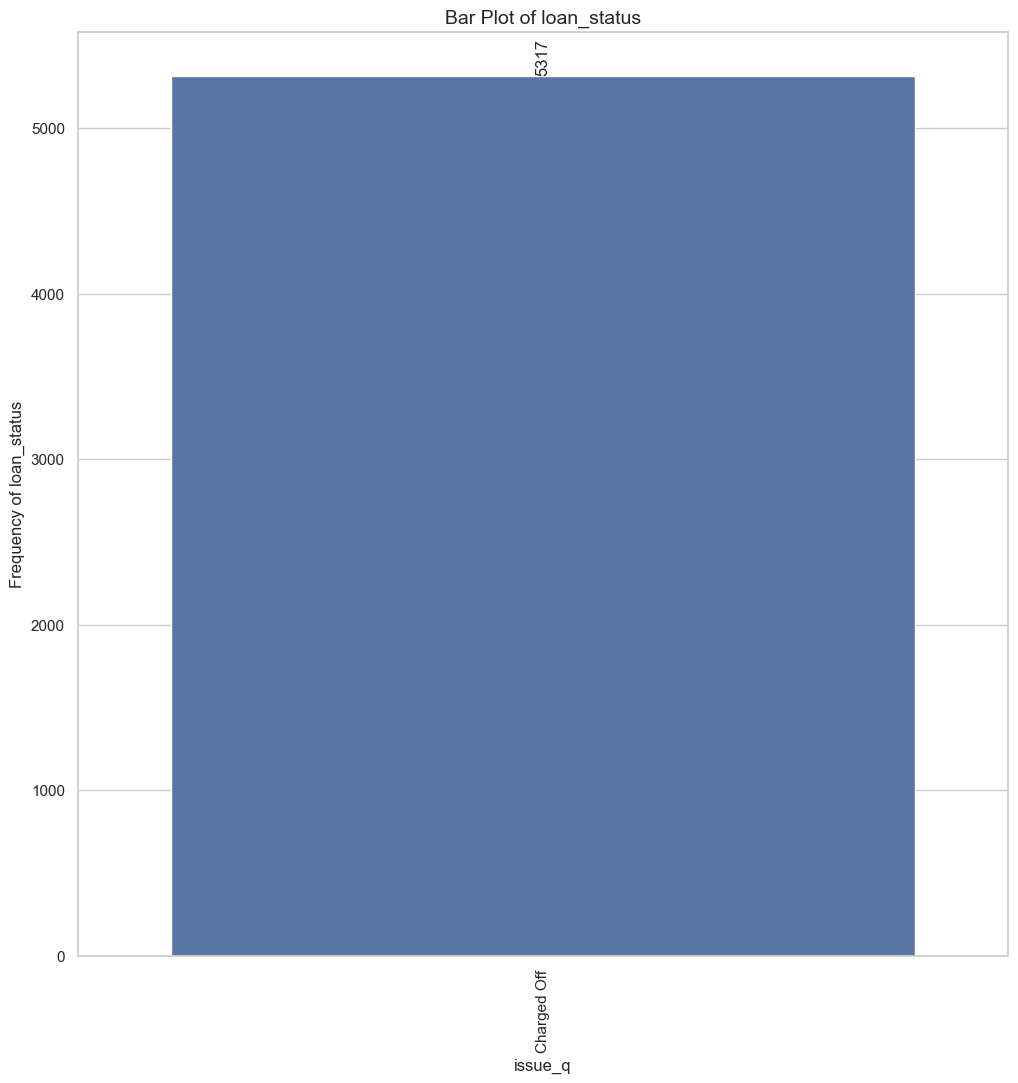

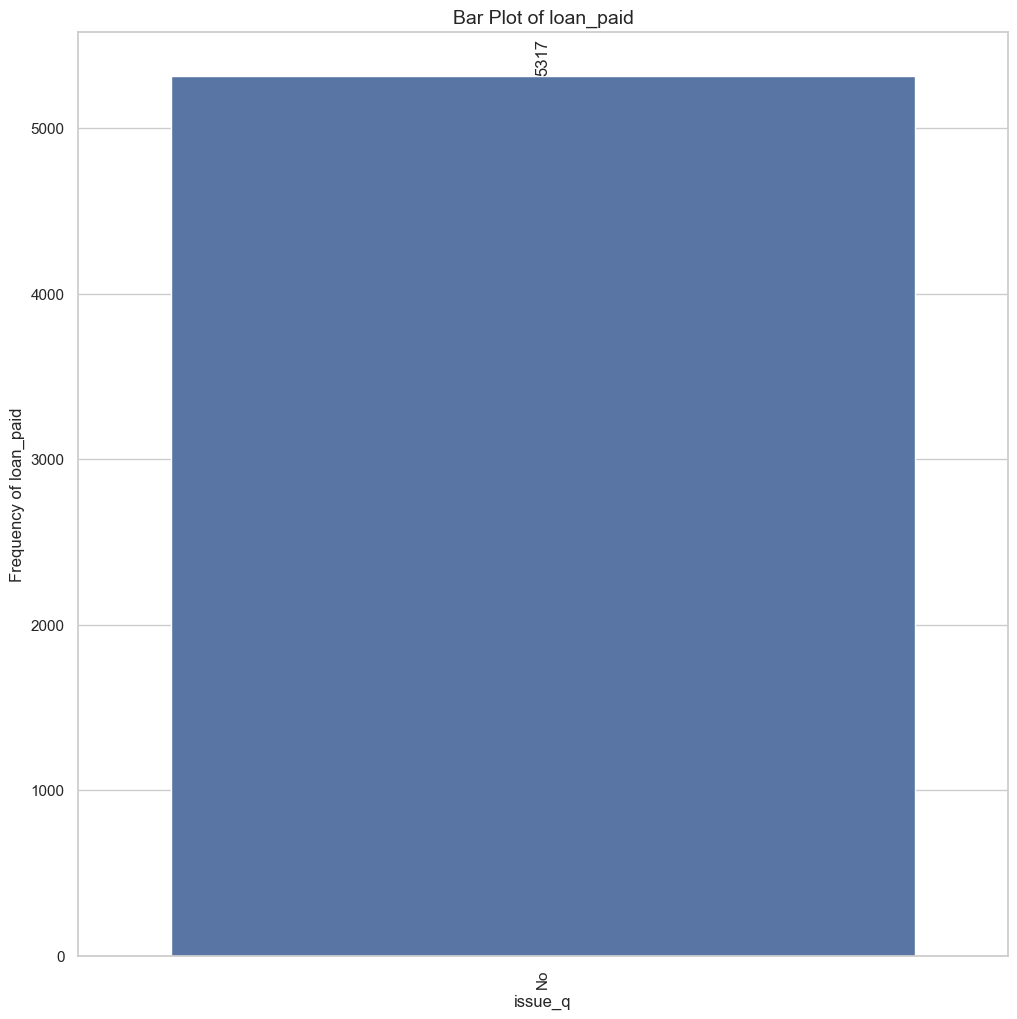

In [95]:
# for Unordered Categorical Variables
for un_cat_var in ['addr_state', 'purpose', 'home_ownership', 'loan_status', 'loan_paid']:
    plot_bar_graph(
        df,
        x_column = un_cat_var,
        y_column = un_cat_var,
        title = f'Bar Plot of {un_cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {un_cat_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

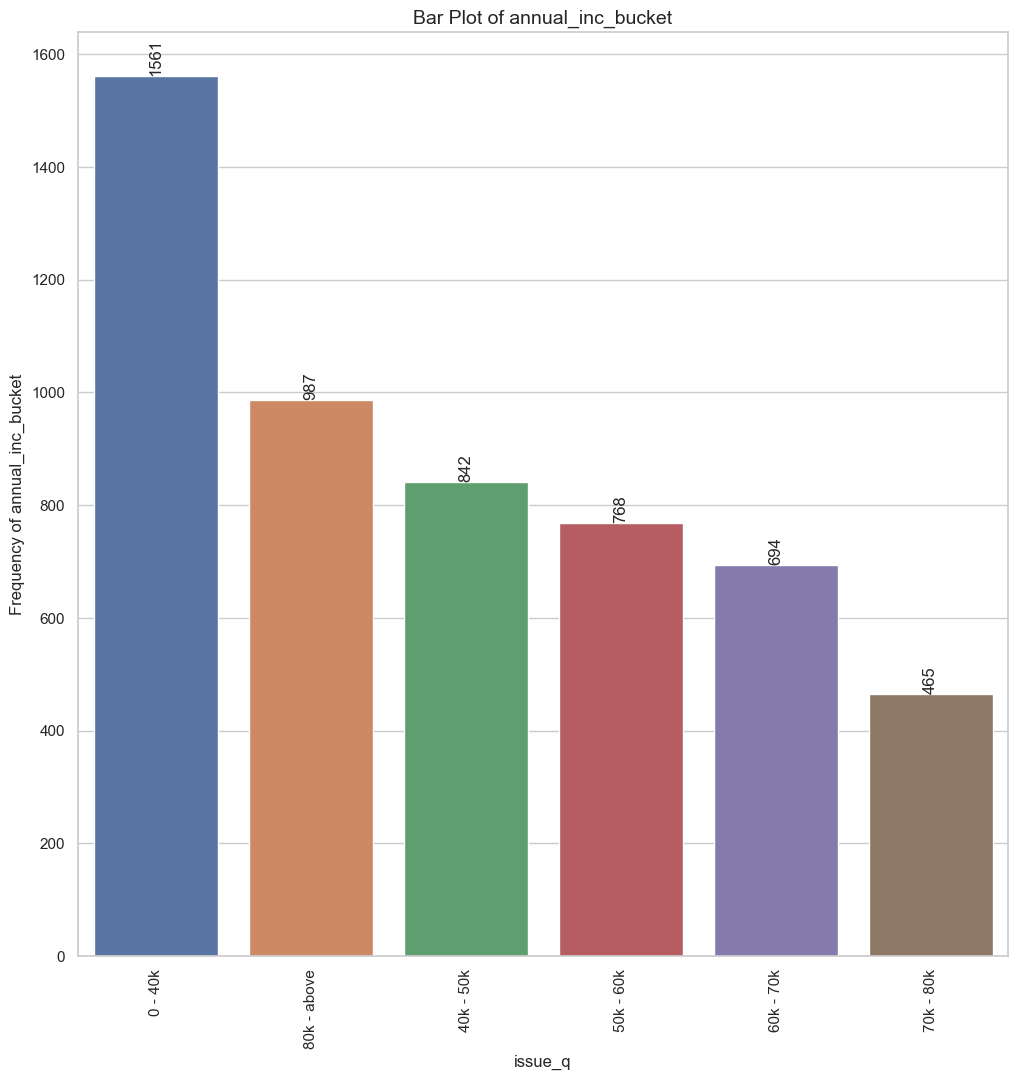

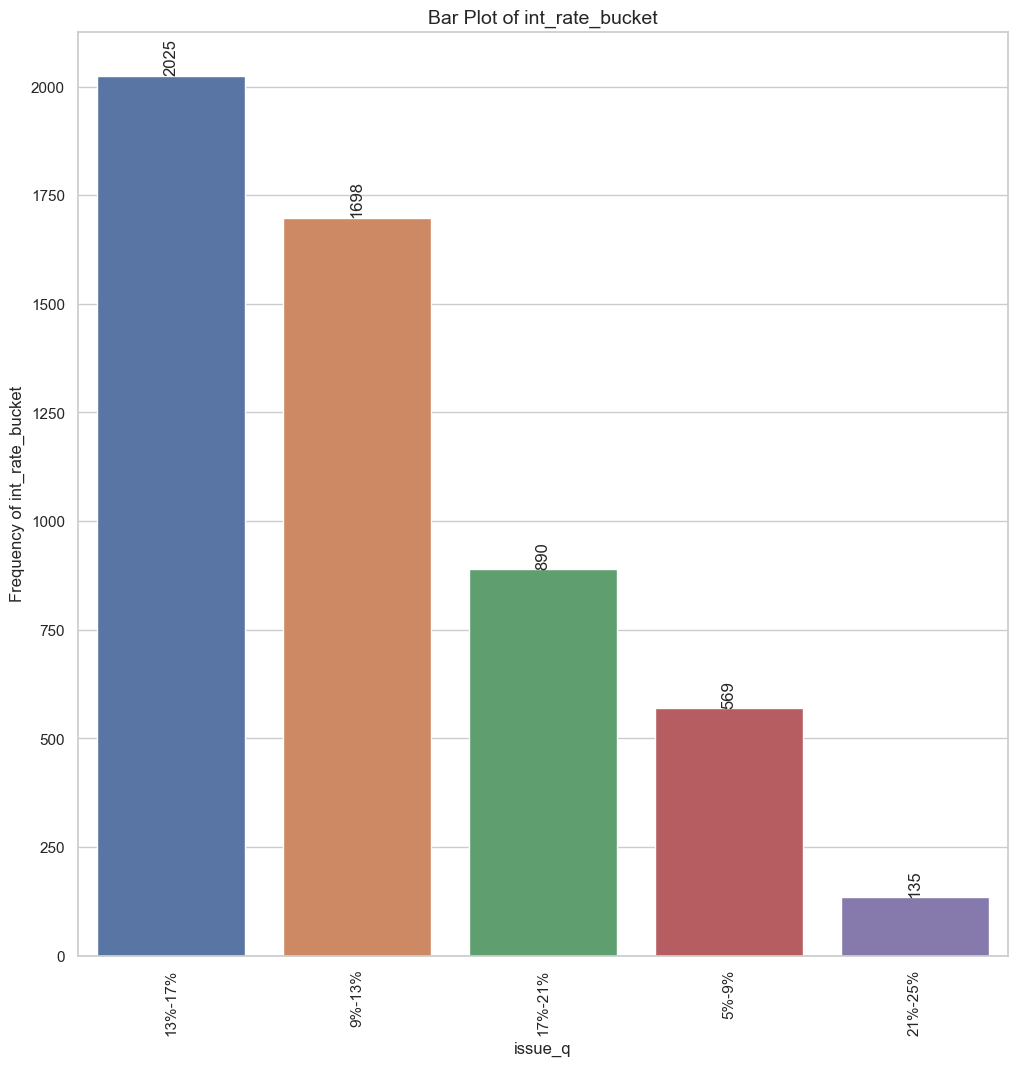

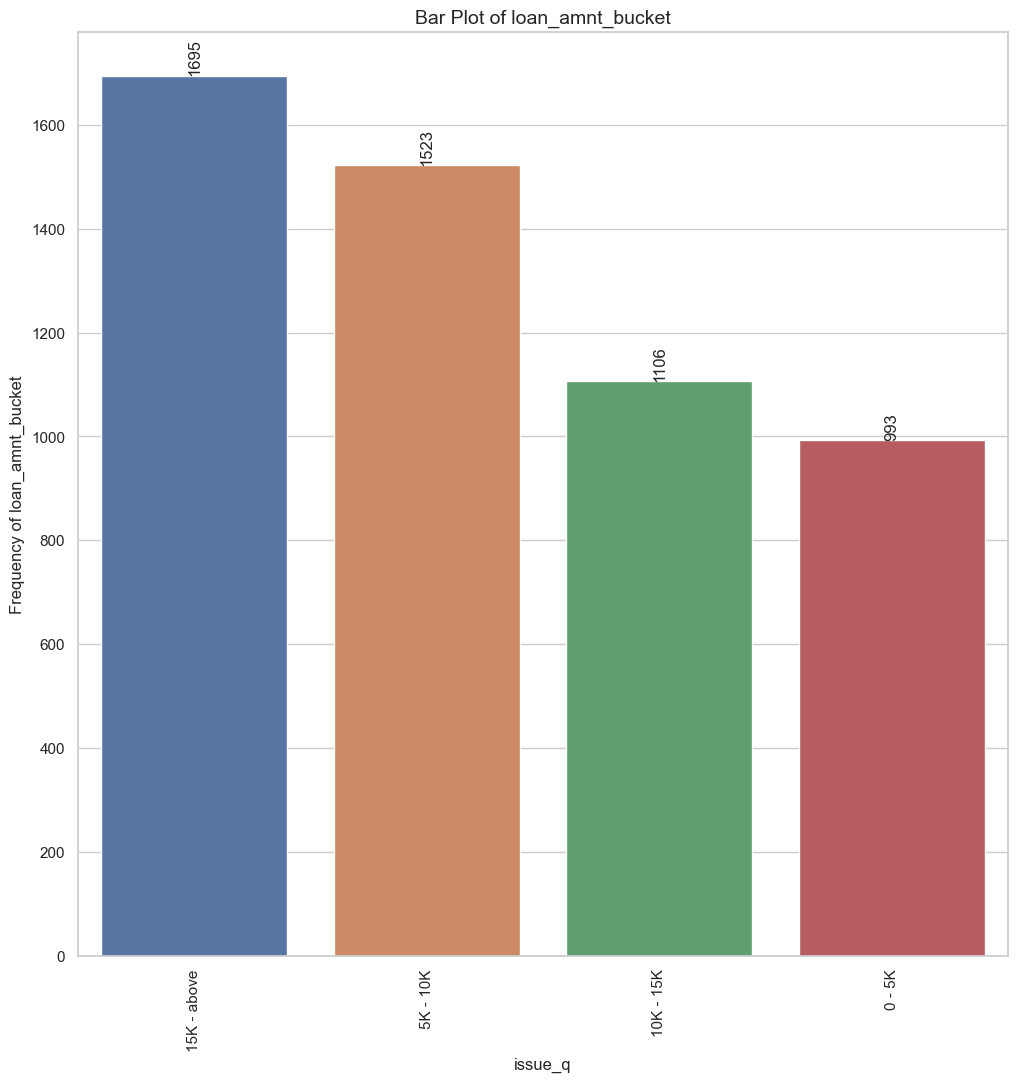

KeyError: 'funded_amnt_bucket'

<Figure size 1200x1200 with 0 Axes>

In [96]:
# for numeric feilds 
for quant_var in ['annual_inc_bucket', 'int_rate_bucket', 'loan_amnt_bucket', 'funded_amnt_bucket', 'dti_bucket']:
    plot_bar_graph(
       df,
        x_column = quant_var,
        y_column = quant_var,
        title = f'Bar Plot of {quant_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {quant_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

In [98]:
installments_df = df[df.loan_paid == 'No']

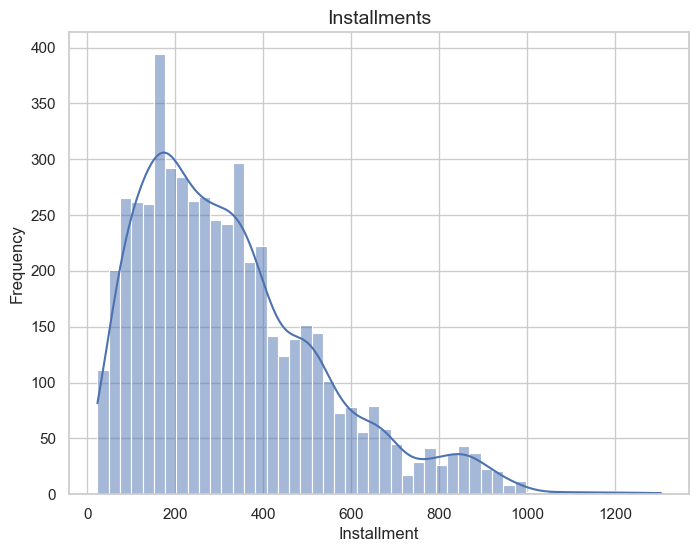

In [99]:
plot_histogram(installments_df, column='installment', bins=50, title='Installments', xlabel='Installment', ylabel='Frequency')

# Conclusions from univariate analysis :
Applicants who had been employed for more than 10 years are for the highest number of "Charged off" loans, totaling 1,474. 
This indicates that long-term employment history did not necessarily guarantee successful loan repayment.
The majority of "Charged off" loan participants, totaling 2,715 individuals, lived in rented houses. The lending company must assess the financial stability of applicants living in rented houses, as they may be more susceptible to economic fluctuations.
A significant number of loan participants, specifically 5,317 individuals, were loan defaulters, unable to clear their loans.
Among loan participants who charged off, 1,178 loan applicants had very high debt-to-income ratios. 

Bivariate analysis :
Will check the above identified categorical and numerical fields against Loan Status.

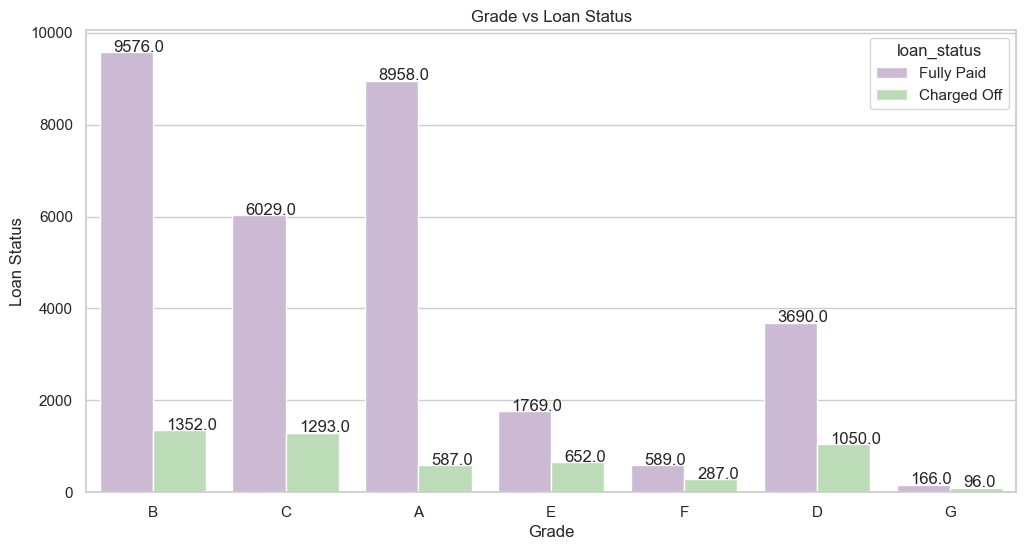

In [100]:
#Grade vs. Loan Status
countplot_graph({
    'data': df,
    'x': 'grade',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Grade',
    'ylabel': 'Loan Status',
    'title': 'Grade vs Loan Status',
    'palette': 'PRGn'
})
#As per the below graph we can see ,the loan applicants belonging to Grades B, C and D contribute to most number of "Charged Off" loans

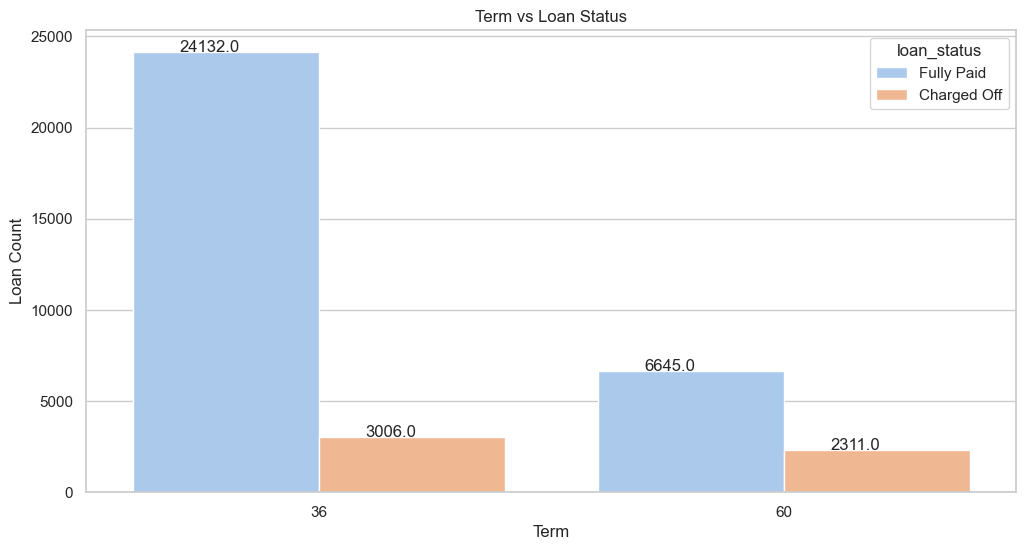

In [101]:
#Term vs. Loan Status
countplot_graph({
    'data': df,
    'x': 'term',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Term',
    'ylabel': 'Loan Count',
    'title': 'Term vs Loan Status',
    'palette': 'pastel'
})

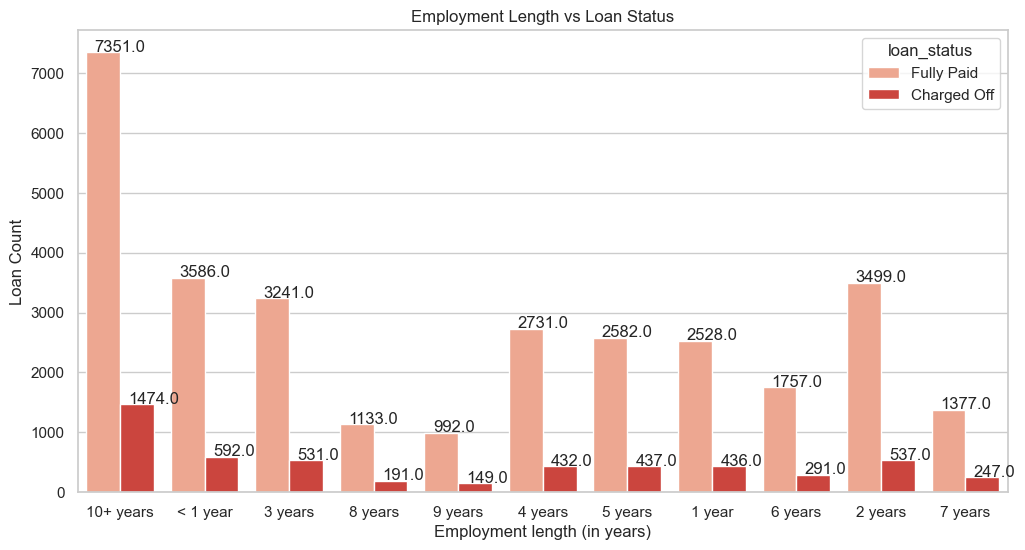

In [102]:
#Employment Length vs. Loan Status
countplot_graph({
    'data': df,
    'x': 'emp_length',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Employment length (in years)',
    'ylabel': 'Loan Count',
    'title': 'Employment Length vs Loan Status',
    'palette': "Reds"
})
#As per thhe observation below ,most number of loan applicants are 10 or more years of experience. They also are the ones who are most likely to default

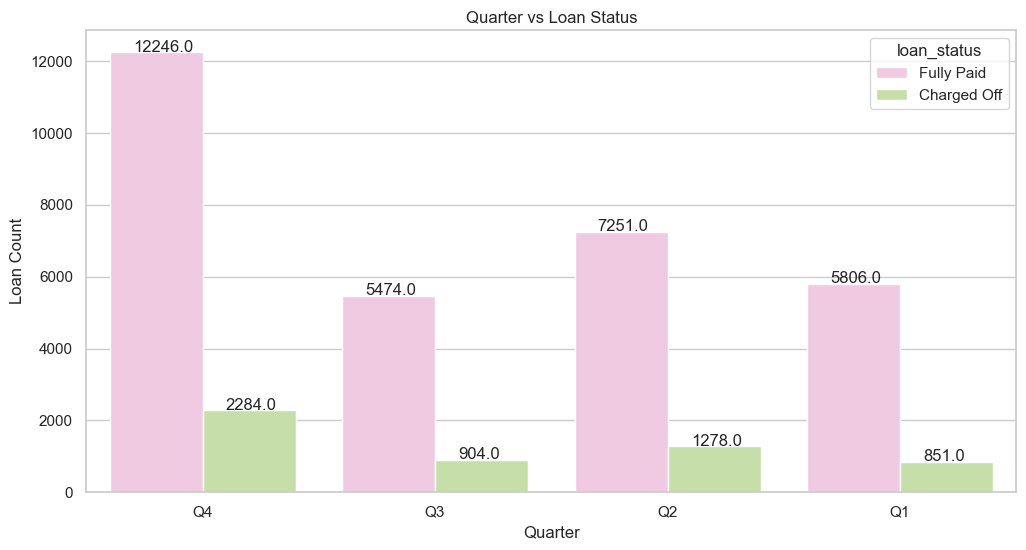

In [103]:
#Loan Quarter vs. Loan Status
countplot_graph({
    'data': df,
    'x': 'issue_q',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Quarter',
    'ylabel': 'Loan Count',
    'title': 'Quarter vs Loan Status',
    'palette': "PiYG"
})
#as per the observatios , Q4 is the most preferred quarter for taking loans. This is mainly due to the holiday season coming up.

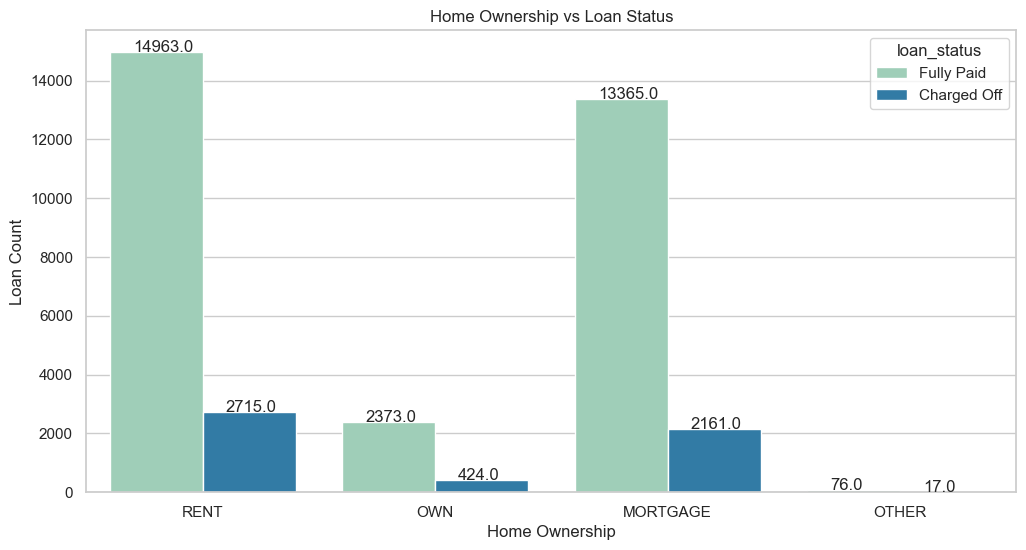

In [105]:
#Home Ownership vs. Loan Status
countplot_graph({
    'data': df,
    'x': 'home_ownership',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Home Ownership',
    'ylabel': 'Loan Count',
    'title': 'Home Ownership vs Loan Status',
    'palette': "YlGnBu"
})
#The loan applicants who live in a rented or mortgaged house are more likely to default

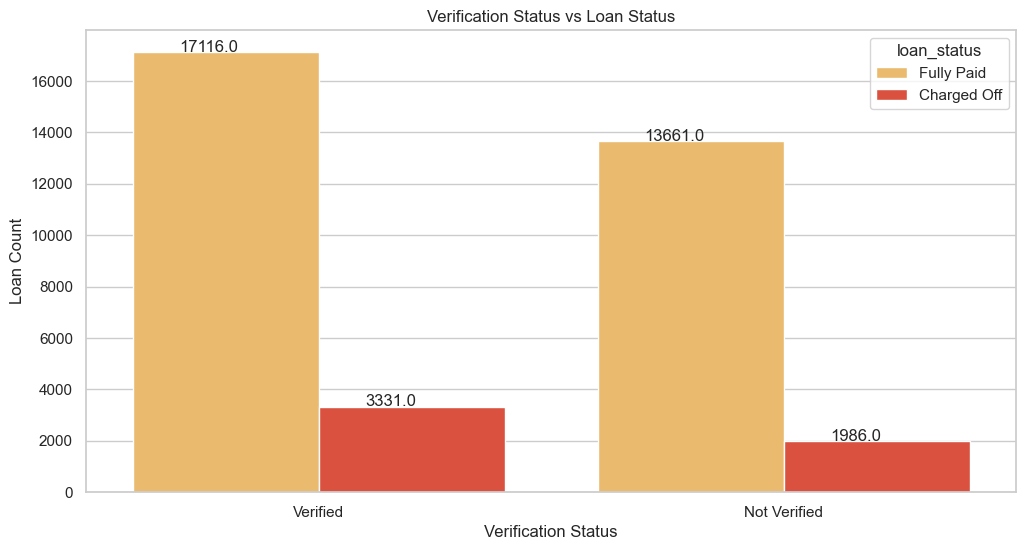

In [106]:
#Verification Status vs. Loan Status
countplot_graph({
    'data': df,
    'x': 'verification_status',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Verification Status',
    'ylabel': 'Loan Count',
    'title': 'Verification Status vs Loan Status',
    'palette': "YlOrRd"
})
#The loan applicants who have been verified are defaulting more than the applicants who are not verified

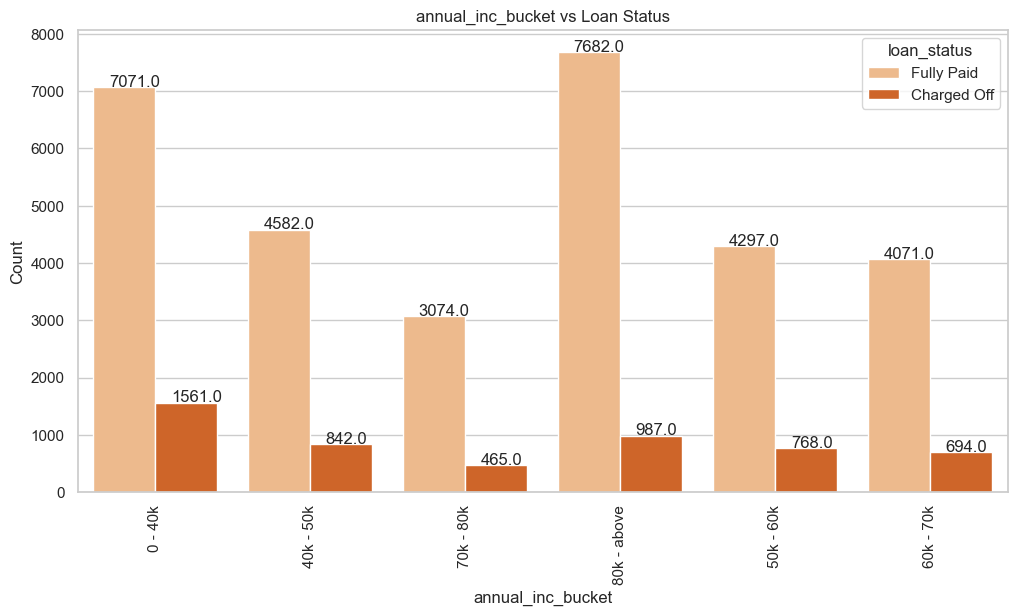

ValueError: Could not interpret input 'funded_amnt_bucket'

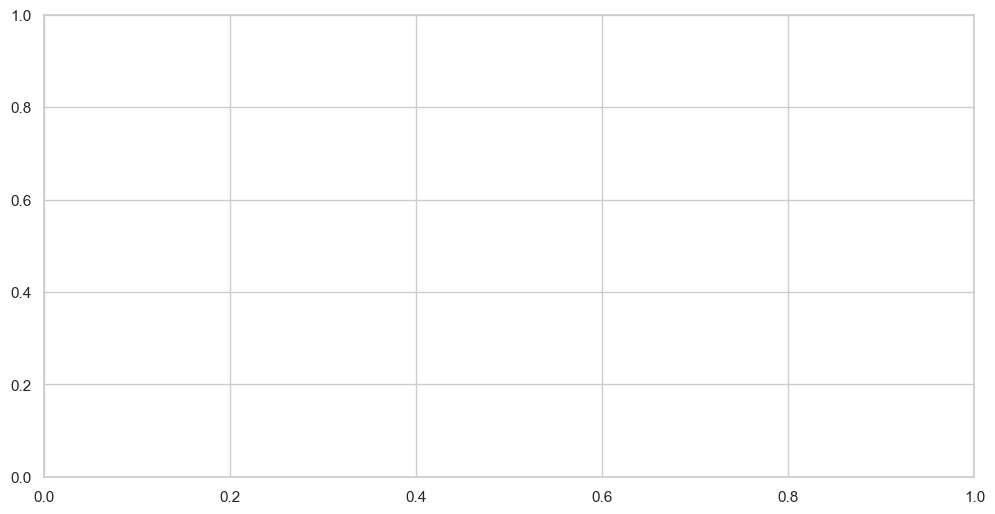

In [107]:
#bivariate with numeric fields 

for col in ['annual_inc_bucket', 'funded_amnt_bucket', 'int_rate_bucket', 'dti_bucket', 'loan_amnt_bucket']:
    countplot_graph({
    'data': df,
    'x': col,
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': col,
    'ylabel': 'Count',
    'title': f'{col} vs Loan Status',
    'palette': "Oranges",
    'x_tick_rotation': 90
}, annot=True)

# Conclusions from bivariate analysis :
The loan applicants belonging to Grades B, C, and D contribute to most of the "Charged Off" loans.
The fourth quarter (Q4) is the most preferred quarter for taking loans, primarily because of the upcoming holiday season.
Loan applicants who live in rented or mortgaged houses are more likely to default.
Verified loan applicants are defaulting more than those who are not verified.

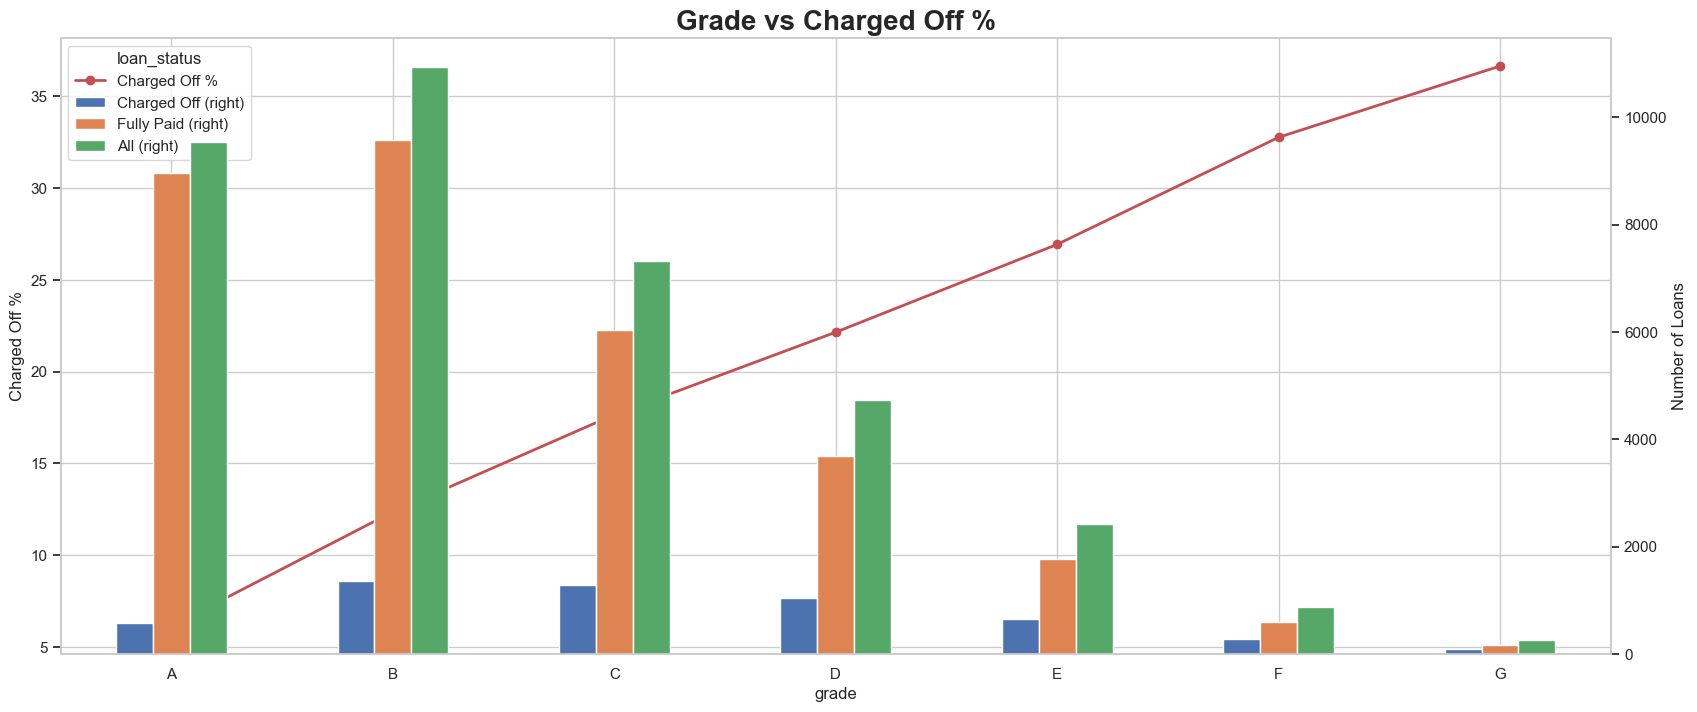

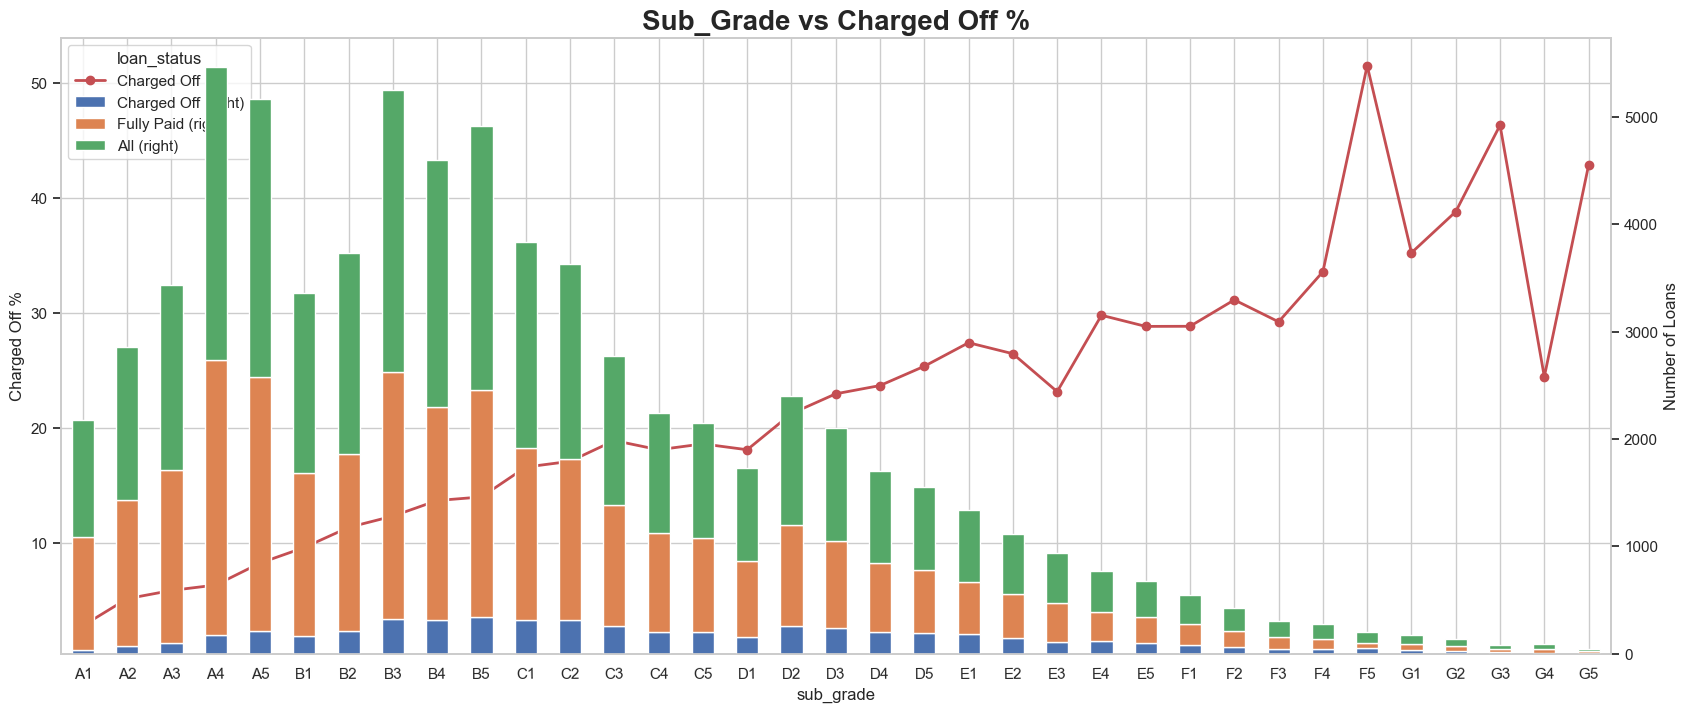

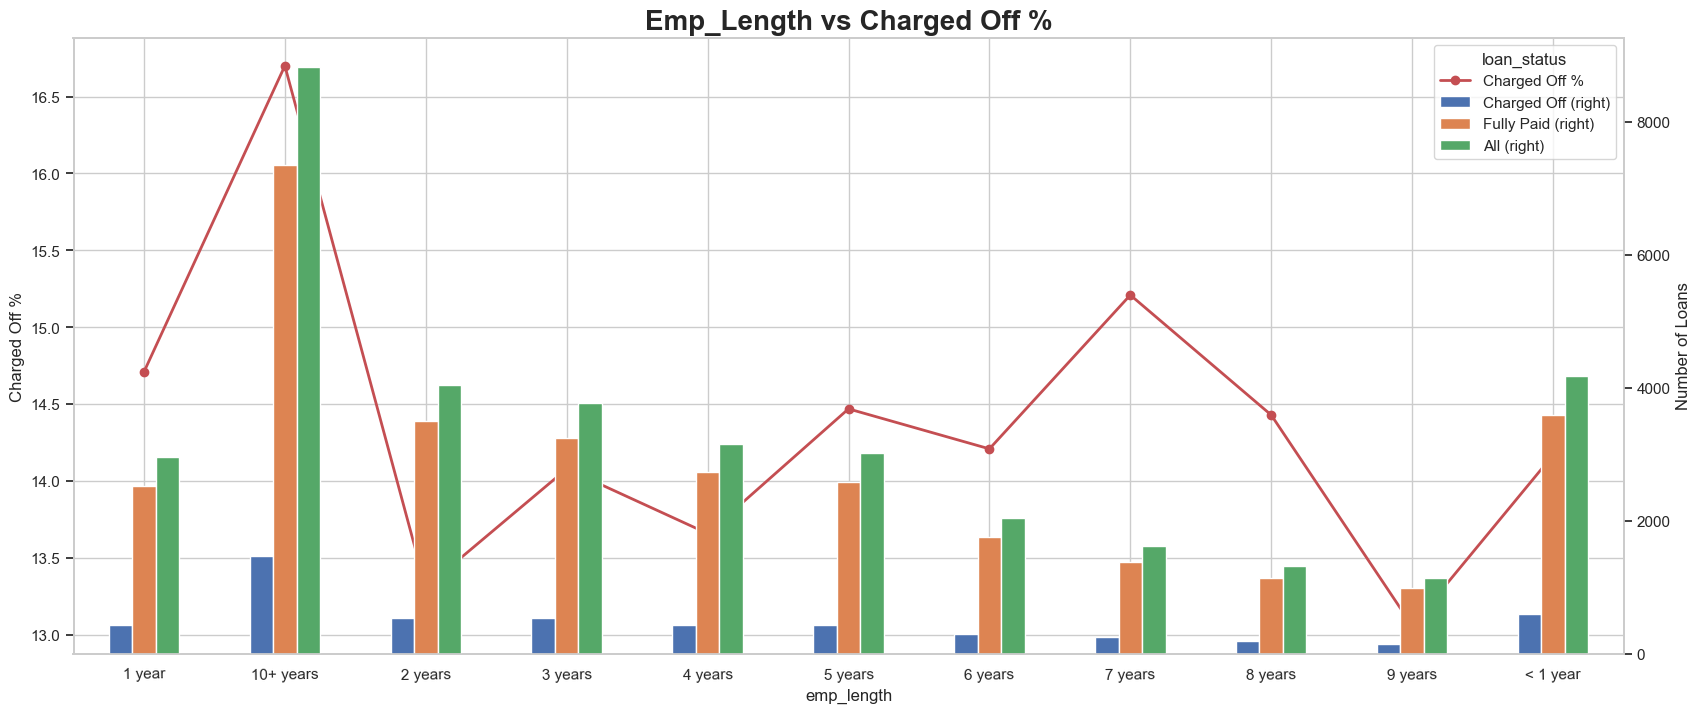

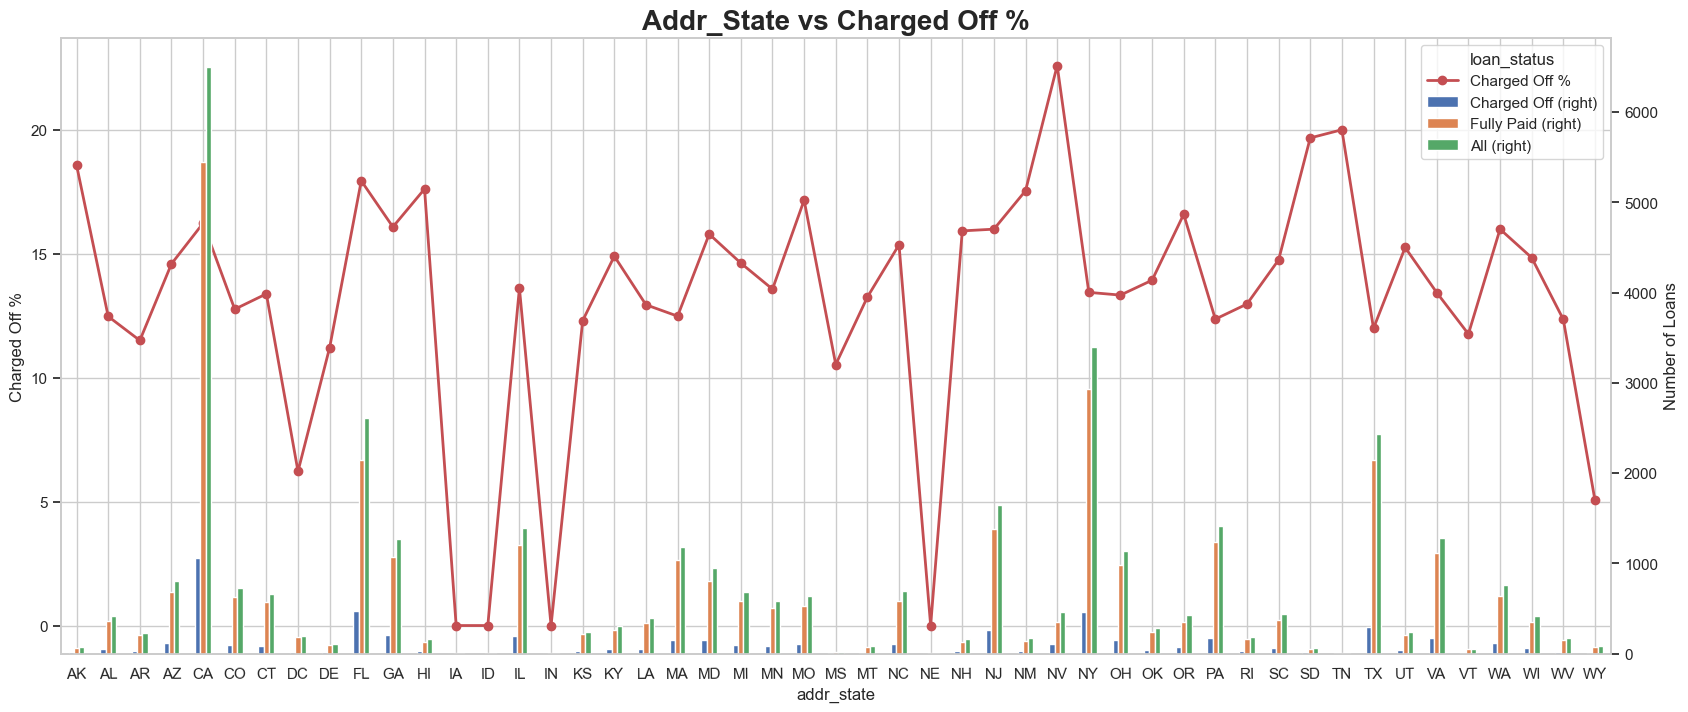

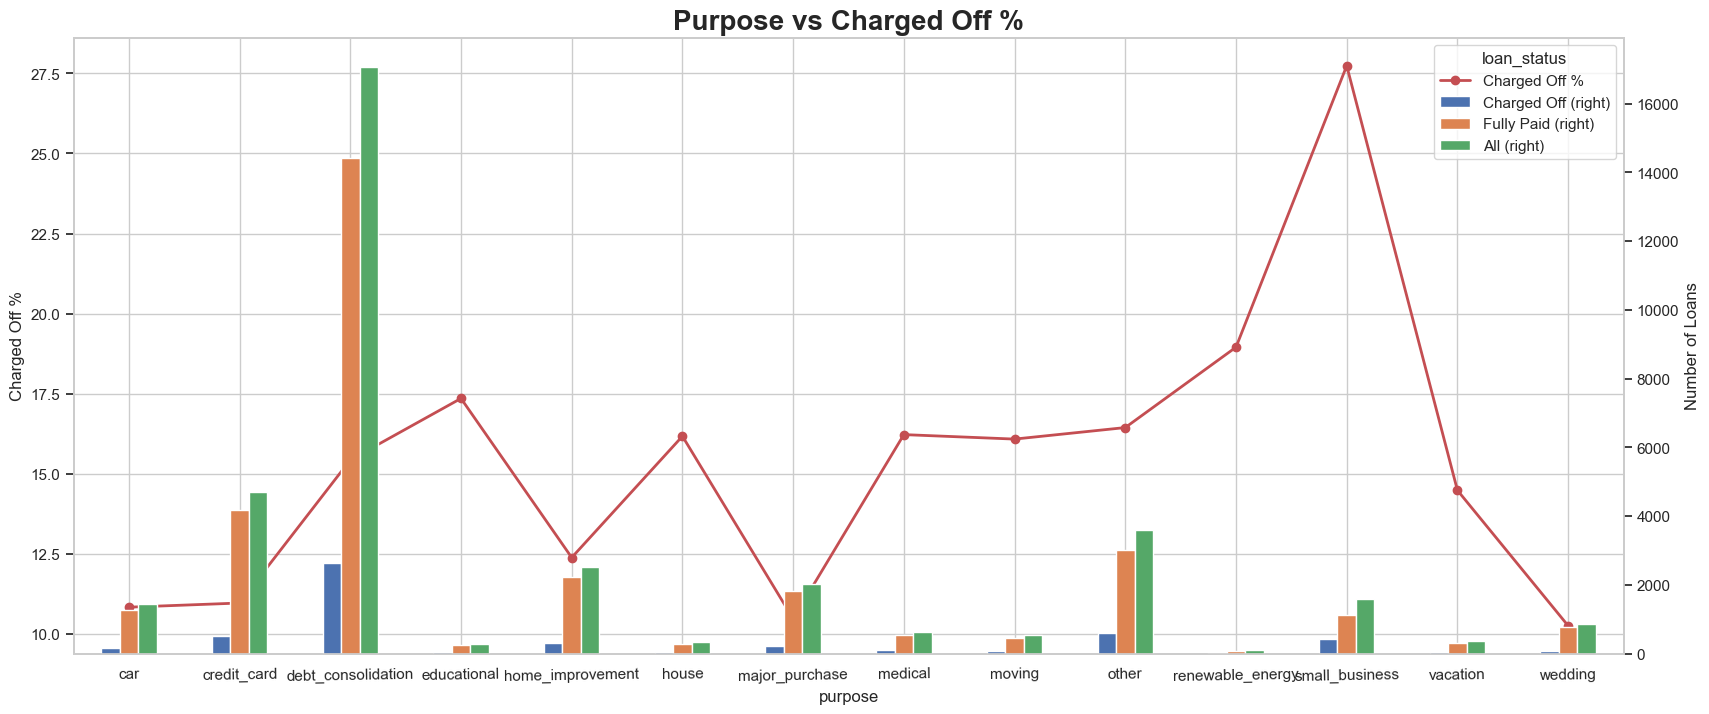

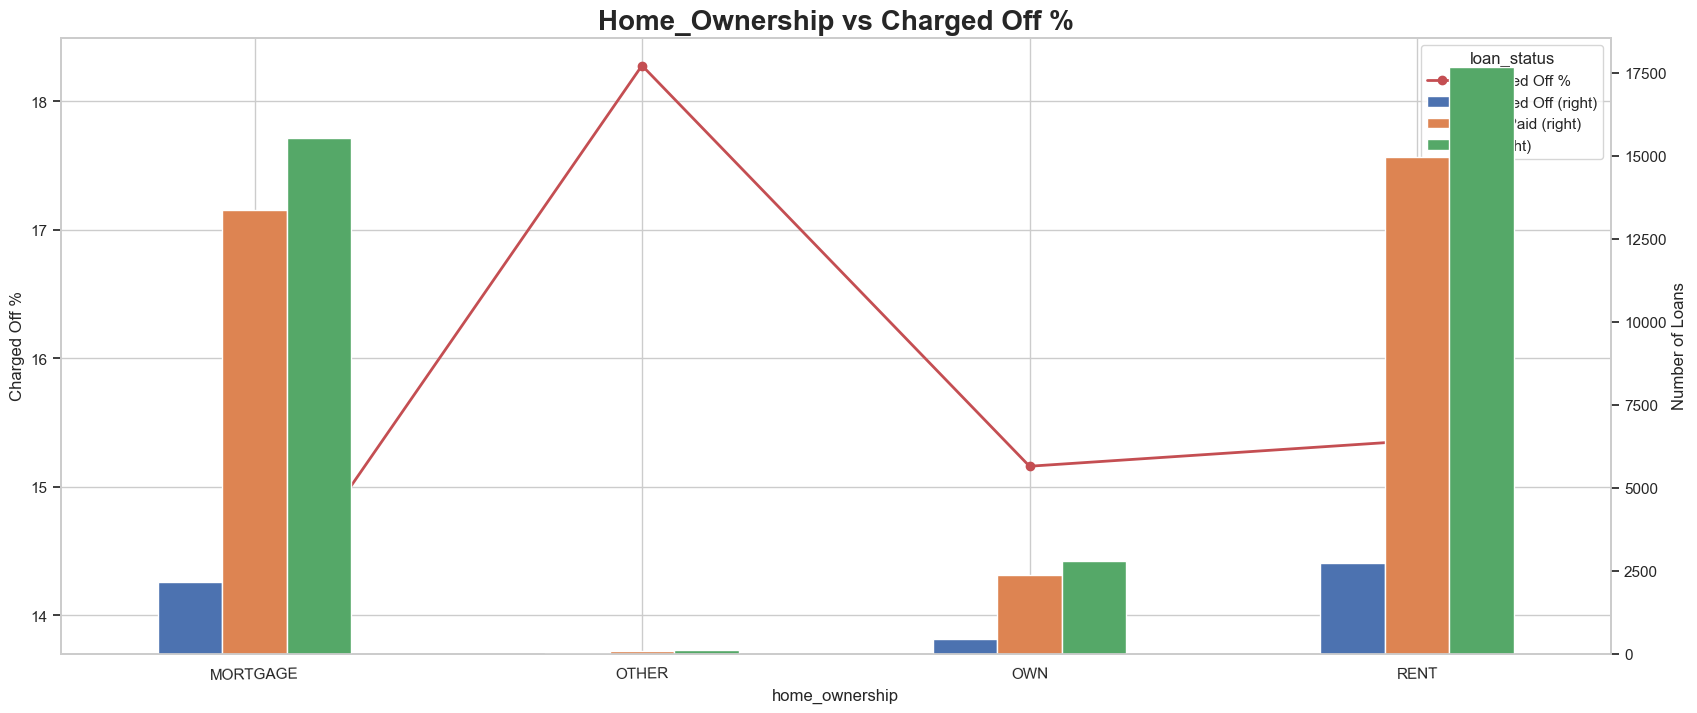

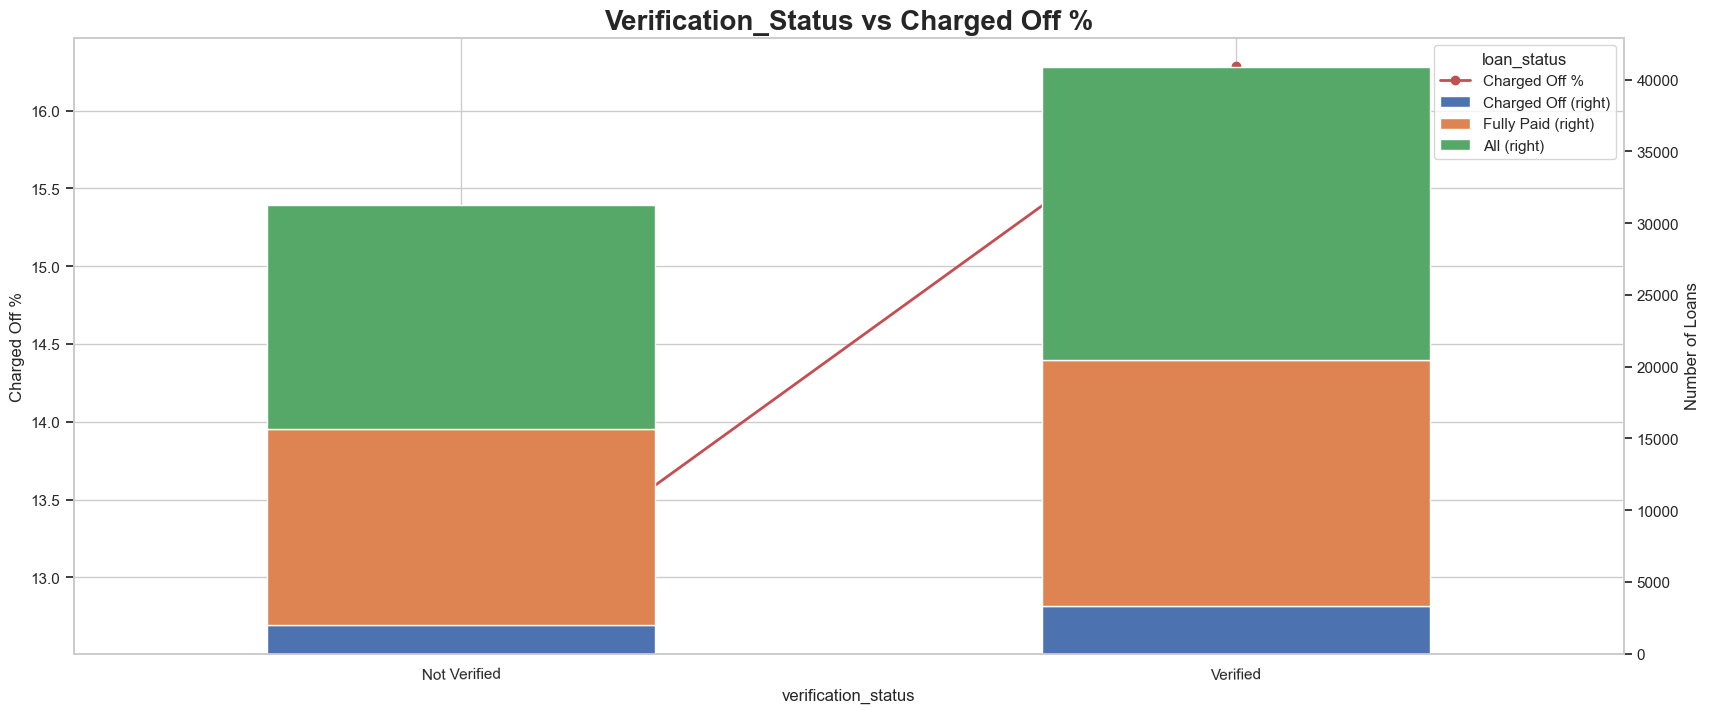

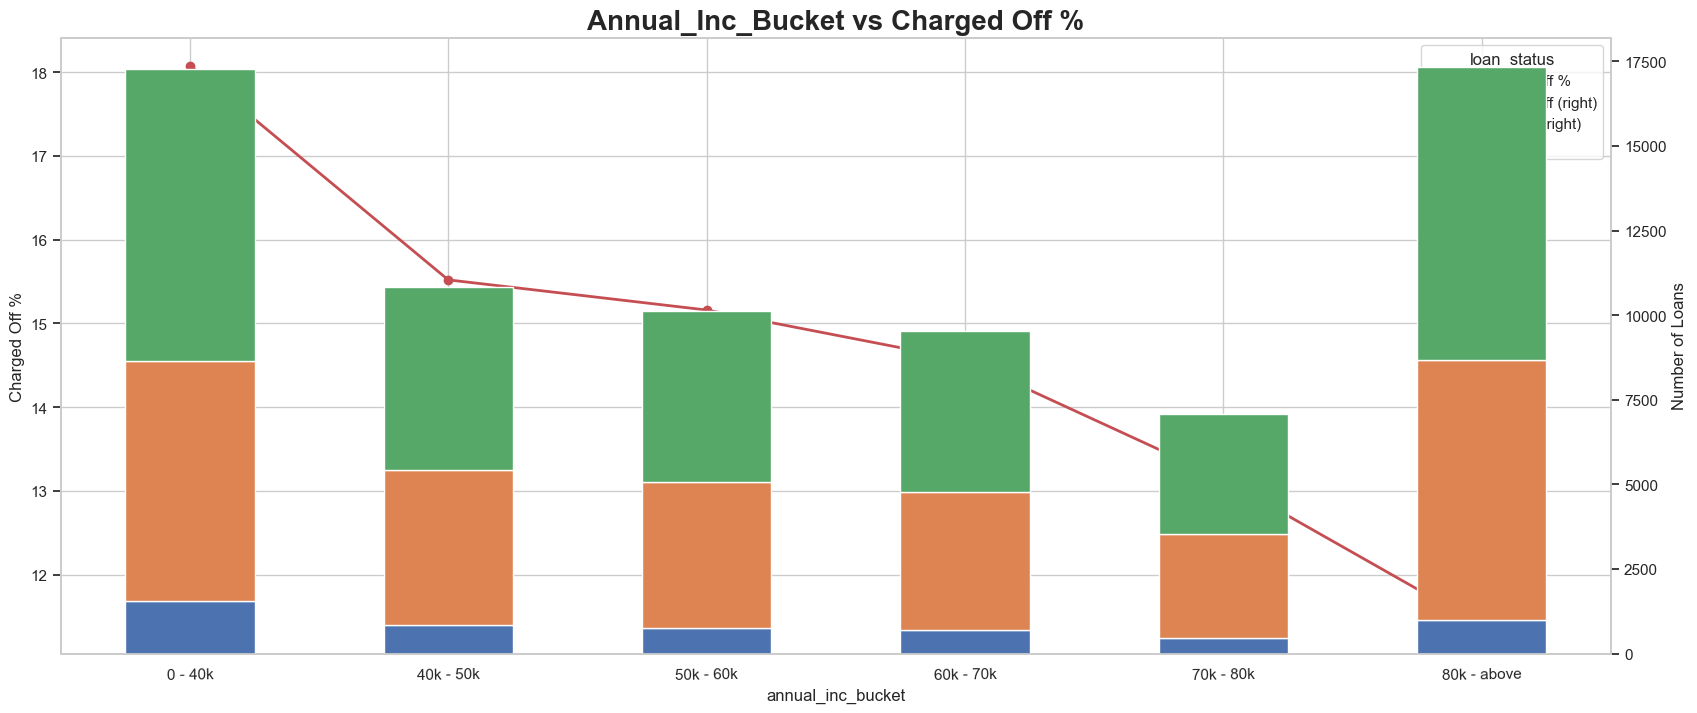

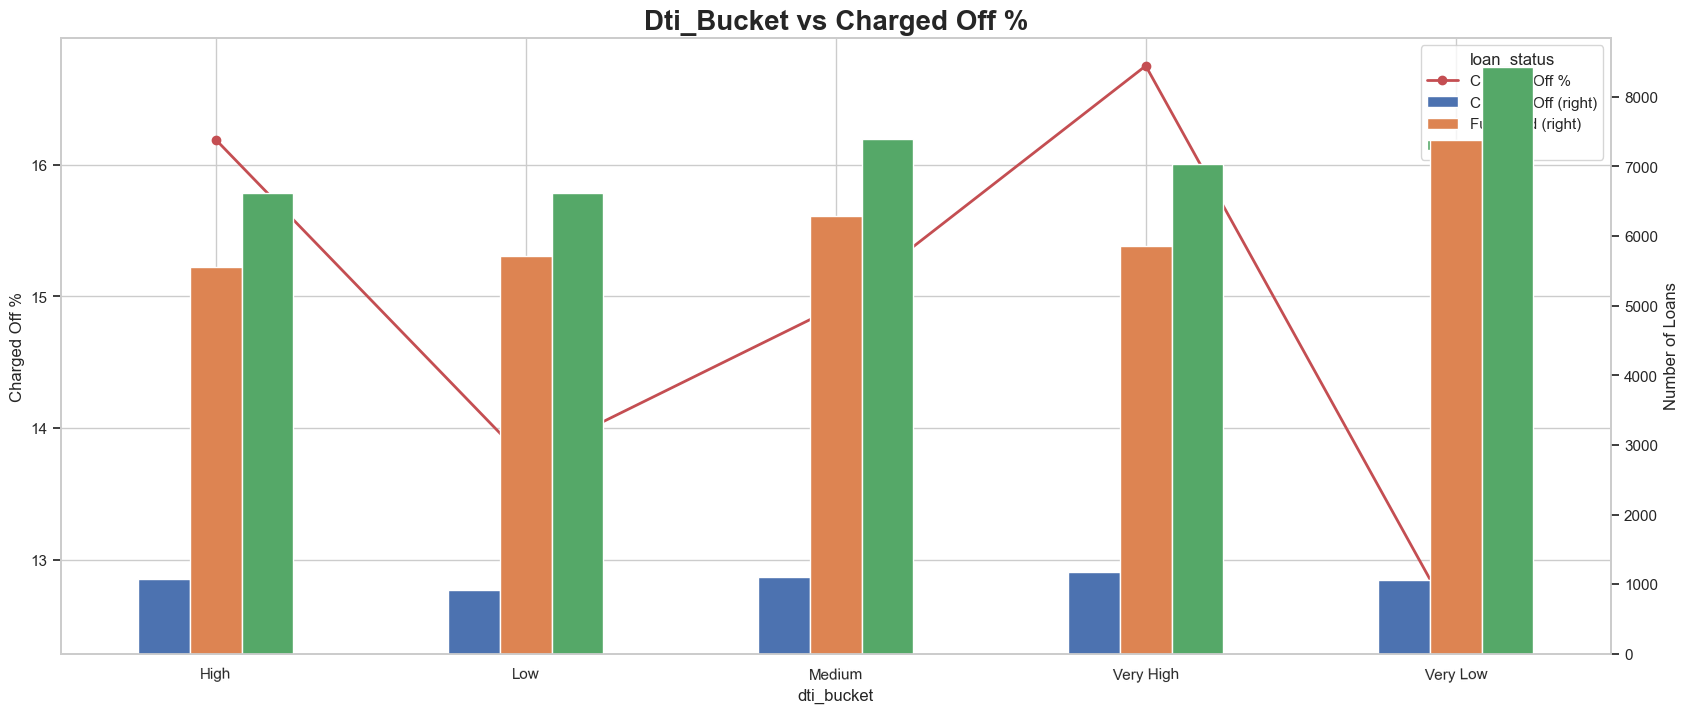

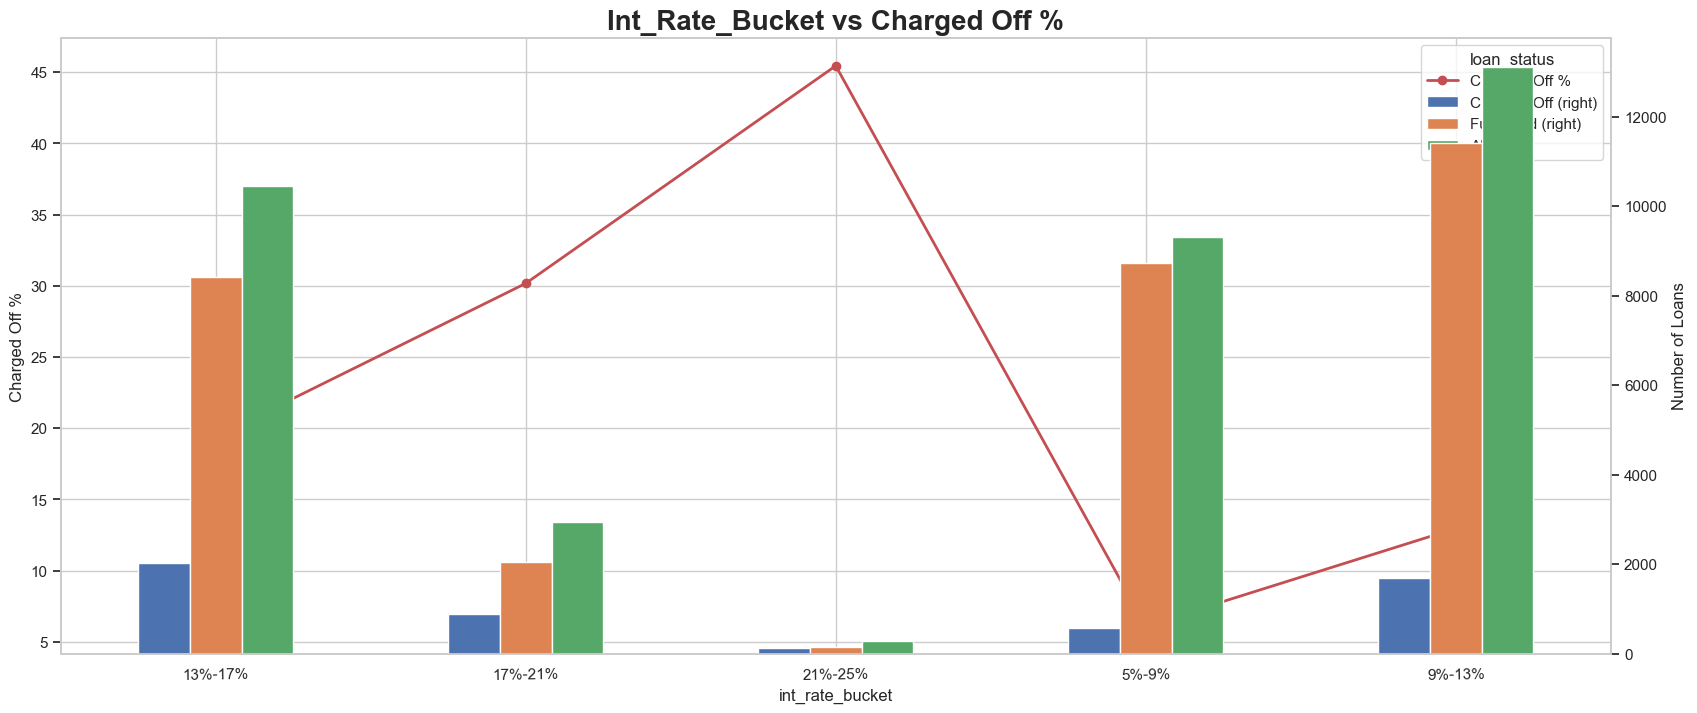

In [114]:
#Multivariate analysis is done for below columns against loan status and the charged off percentage

columns_config = {
    'grade': {},
    'sub_grade': {'stacked': True},
    'emp_length': {},
    'addr_state': {},
    'purpose': {},
    'home_ownership': {},
    'verification_status': {'stacked': True},
    'annual_inc_bucket': {'stacked': True},
    'dti_bucket': {},
    'int_rate_bucket': {}
}

for column, plot_config in columns_config.items():
    stacked = plot_config.get('stacked', False)
    plot_charged_off_percentage(df, column, stacked)

# Conclusions from Multivariate analysis:
The tendency to default the loan is increasing with increase in the interest rate.
Loan applicants with 10 years of experience has maximum tendancy to default the loan.
Tendency to default the loan is likely with loan applicants belonging to B, C, D grades.